# **Real-Time Event Recognition in MLB Social Media Streams Using Natural Language Processing**

## Brandon L Medina
## Claremont Graduate University
## IST 332: Natural Language Processing

---

>[Real-Time Event Recognition in MLB Social Media Streams Using Natural Language Processing](#scrollTo=3CCaHaBKfIJ_)

>>[Brandon L Medina](#scrollTo=3CCaHaBKfIJ_)

>>[Claremont Graduate University](#scrollTo=3CCaHaBKfIJ_)

>>[IST 332: Natural Language Processing](#scrollTo=3CCaHaBKfIJ_)

>>>[Part 1 – Introduction & Research Question](#scrollTo=qyqL2ZcgfRHp)

>>>>[1.1     Problem Statement](#scrollTo=vJuItYFGkhYb)

>>>>[1.2     Research Question](#scrollTo=v1X-rM73kkpa)

>>>>[1.3     Sub Questions](#scrollTo=xIIMdAmfkoQf)

>>>>[1.4     Targeted Variables](#scrollTo=Xtg7JhYtksMf)

>>>>[1.5     Coding Envirionment](#scrollTo=qwW5voDoritf)

>>>[Part 2 – Corpus Creation (Data Collection)](#scrollTo=tL4H5R81k0Ui)

>>>>[2.1    Corpus Creation](#scrollTo=GXrTe8Ork4HG)

>>>>[2.2    Data Collection](#scrollTo=ViWMzxatu-RH)

>>>>[2.3    Ethical Considerations](#scrollTo=kGHbH6ngJSnJ)

>>>>[2.4    Summary Statistics](#scrollTo=GGk5_DGeOPZh)

>>>>[2.5 Event Alignment](#scrollTo=NzhNlfeARhY-)

>>>[Part 3 - Text Preprocessing](#scrollTo=Z2AsetT6TaNU)

>>>>[3.1 Preprocessing Foundation](#scrollTo=KDQDR8plWa_l)

>>>>[3.2 Lowercasing / Normalization](#scrollTo=FRtm6Y8IWuVQ)

>>>>[3.3 Remove URLs, Markdown Artifacts, Emojis, and Non-Linguistic Noise](#scrollTo=DQ1wrFWxYH5b)

>>>>[3.4 Remove Punctuation and Special Characters](#scrollTo=0lbGkeOUY4nB)

>>>>[3.5 Tokenization](#scrollTo=lnnmVsweZR0h)

>>>>[3.6 Stopword Removal](#scrollTo=sG-RpTsoZkbX)

>>>>[3.7 Lemmatization](#scrollTo=udkxQ692Z-QA)

>>>>[3.8 Examples of Raw vs Clean text](#scrollTo=ewQR8VdXajX1)

>>>>[3.9 Corpus Statistics](#scrollTo=qK9ezTNkaz9B)

>>>[Part 4 - Data Understanding and Preparation](#scrollTo=MVsDX343bQnb)

>>>>[4.1 Exploratory Analysis of Text Data](#scrollTo=xI5E3nLhbasL)

>>>>[4.2 Word Frequency & Category Distribution](#scrollTo=qAIT2AEwbiZX)

>>>>>[4.2.1 Top Word Frequencies](#scrollTo=KVU9bx4kbpK_)

>>>>>[4.2.2 Distribution by Category (Pitch Descriptions)](#scrollTo=01AF7_37b-sy)

>>>>[Part 5 - Sentiment Analysis](#scrollTo=koQq2RQKPQge)

>>>>>[5.1 Sentiment Analysis Setup](#scrollTo=4uMj1tjMPvSW)

>>>>>[5.2 Compute Sentiment Score](#scrollTo=D89ExWY8QEfA)

>>>>>[5.3 Visualizations](#scrollTo=n5NCyR3pQUGu)

>>>>>[5.4 Save Sentiment Summaries](#scrollTo=FrILTv_eQlmI)

>>>>[Part 6 - Topic Modeling](#scrollTo=p43h-4DQX76t)

>>>>>[6.1 Topic Modeling with Hyperparameter Tuning (LDA)](#scrollTo=91gDc9uMYBKh)

>>>>>[6.2 View hyperparameter results](#scrollTo=ambwGjLvbCA8)

>>>>>[6.3 Selecting the Best Model](#scrollTo=7zJusF1VbKjC)

>>>>>[6.4 Assign topics](#scrollTo=jfL4a6yBbUCu)

>>>>>[6.5 Visualization](#scrollTo=ND49p9gtbaEW)

>>>>[Part 7 - Supervised Learning](#scrollTo=GmZnbThEgasZ)

>>>>>[Pre-Step](#scrollTo=mAH1dA69knvY)

>>>>>[7.1 Prepare Dataset for Supervised Learning](#scrollTo=NabdYXUXlKVt)

>>>>>[7.2 Train/Test Split (Stratified)](#scrollTo=ABV34kuflU11)

>>>>>[7.3 TF-IDF Vectorization](#scrollTo=r3S_ws4nlcd1)

>>>>>[7.4 Logistic Regression Classifier](#scrollTo=kfPKzGP8ljAy)

>>>>>[7.5 Linear SVM Classifier](#scrollTo=y6-JE0-jlqiZ)

>>>>>[7.6 Random Forest Classifier](#scrollTo=4fLbV_wflymn)

>>>>>[7.7 Model Comparison Table](#scrollTo=YA8z-_wyl6Ec)

>>>>>[7.8 Confusion Matrices](#scrollTo=PFV4kUuJmEEr)

>>>>>[7.9 Transformer Model (DistilBERT Fine-Tuning)](#scrollTo=0Wk2BmBOmLg-)

>>>>>[7.10 Updated model comparison](#scrollTo=pdSBRIhquRLv)



### Part 1 – Introduction & Research Question

#### 1.1     Problem Statement

While structured data collected during MLB games captures the statistical aspect of the game, fan reactions expressed through social media remain largely unstructured and unanalyzed. This gap limits an organization’s ability to monitor fan engagement, identify moments of heightened interest, and assess sentiment in real-time. By applying natural language processing models that align social media comments with official play-by-play data, this research aims to transform unstructured social media discourse into structured insights, thereby bridging the gap between quantitative game data and qualitative audience reactions.

#### 1.2     Research Question

How effectively can machine learning and natural language processing (NLP) models detect and classify Major League Baseball (MLB) in-game events in real time using social media comments that are temporally aligned with official play-by-play data?

#### 1.3     Sub Questions


*   How can temporal alignment be accurately used between Reddit comments and MLB play-by-play data to approximate actual game events?
*   How do classic NLP methods like TF-IDF compare to transformer-based models like BERT or Longformer in predicting events from fan discourse?
*   Can models trained on comments with known outcomes effectively generalize to unseen games or new social media platforms (e.g., X/Twitter)

#### 1.4     Targeted Variables
* Relevance classification – determines whether a comment refers to an actual in-game event.
* Event classification – identifies the specific event that occurred in-game (e.g., homerun, strikeout, stolen base) based on the comment text.

#### 1.5     Coding Envirionment

This project is implemented in Google Colab, which provides a reproducible cloud-based platform for large-scale text processing, data analysis, and model development. Colab ensures consistent execution, offers GPU acceleration when needed, and integrates smoothly with external data sources and Python’s scientific ecosystem. The environment relies on the following core packages to support corpus creation, preprocessing, and exploratory analysis:
* numpy – numerical operations and matrix-based computation.
* pandas – structured data management and preprocessing.
* nltk – tokenization, stopword handling, and foundational NLP utilities.
* spaCy – fast, production-grade lemmatization and linguistic processing.
* pybaseball – retrieval of official MLB play-by-play data for event alignment.
* tqdm – progress monitoring during large-scale preprocessing tasks.
* praw – collection of Reddit comments from r/baseball Game Threads.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -q pybaseball
print("Sucessfully Installed Pybaseball")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.7 MB/s eta 0:00:00
Sucessfully Installed Pybaseball


In [3]:
!pip install -q praw

print("Praw downloaded")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.7 MB/s eta 0:00:00
Praw downloaded


In [4]:
# Core scientific and data handling
import numpy as np
import pandas as pd
import time
import datetime as dt
import sys
import os
import re

# Reddit data collection
import praw
from prawcore.exceptions import TooManyRequests

# MLB data retrieval
from pybaseball import schedule_and_record, statcast, statcast_single_game

# Utility
from tqdm import tqdm

In [5]:
# NLP preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Download required NLTK assets
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Set folder path
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project"

sys.path.append(DATA_PATH)

In [7]:
import warnings
warnings.filterwarnings("ignore")

### Part 2 – Corpus Creation (Data Collection)

#### 2.1    Corpus Creation
* Collect at least 10,000 comments from r/baseball “Game Thread” posts and associated social-media sources.
* Retrieve official MLB play-by-play data using the pybaseball API.
* Parse timestamps and align each comment with the nearest in-game event to produce weak labels for supervised learning.
* Save the corpus in a structured format (CSV) with fields for comment text, upvotes, timestamp, team/game ID, and assigned event label.

#### 2.2    Data Collection

The dataset is constructed by combining social-media commentary with official MLB game data. Reddit comments are collected from r/baseball "Game Thread" posts using the PRAW API, which provides authenticated access to comment text, timestamps, upvotes, and metadata needed for temporal alignment.

To pair fan reactions with in-game events, official MLB play-by-play data is retrieved through the pybaseball library. This includes pitch-level and event-level records required for generating approximate labels.

Together, these sources form a corpus of timestamped comments that can be aligned with play-by-play entries to assist supervised training for event classification models.

In [8]:
import logging

# Kill ONLY the PRAW logger
logging.getLogger("praw").propagate = False
logging.getLogger("praw").setLevel(logging.CRITICAL)

In [9]:
try:
    import reddit_credentials
    reddit = reddit_credentials.get_reddit()
    print("Reddit credentials loaded successfully.")
except Exception as e:
    print("Reddit credentials not found.", e)
    reddit = None

Reddit credentials loaded successfully.


In [10]:
sub = reddit.subreddit("baseball")

In [11]:
UTC = dt.timezone.utc
start = dt.datetime(2025, 10, 24, 0, 0, 0, tzinfo=UTC)
end   = dt.datetime(2025, 11, 1, 23, 59, 59, tzinfo=UTC)
start_ts = int(start.timestamp())
end_ts   = int(end.timestamp())

In [12]:
PREFIX = "game thread: world series game"

In [13]:
def in_window(s):
    return start_ts <= getattr(s, "created_utc", 0) <= end_ts

In [14]:
def is_exact_game_thread(s):
    title = (s.title or "").strip().lower()
    return title.startswith(PREFIX)

In [15]:
seen = {}

In [16]:
def consider(s):
    if not s: return
    if s.id in seen: return
    if not in_window(s): return
    if is_exact_game_thread(s):
        seen[s.id] = s

In [17]:
# 1) new feed and stop at start_ts
for s in sub.new(limit=None):
    if getattr(s, "created_utc", 0) < start_ts:
        break
    consider(s)

# 2) top of the year
for s in sub.top(time_filter="year", limit=1000):
    consider(s)

# 3) broad search then filter strictly
for s in sub.search('"World Series Game"', sort="new", time_filter="year", limit=None):
    consider(s)

posts = sorted(seen.values(), key=lambda x: x.created_utc)

print(f"Matched {len(posts)} posts in {start.date()}–{end.date()}:")
for p in posts:
    when = dt.datetime.fromtimestamp(p.created_utc, tz=UTC).strftime("%Y-%m-%d %H:%M:%S %Z")
    print(" -", when, "|", p.title)

Matched 7 posts in 2025-10-24–2025-11-01:
 - 2025-10-24 23:00:30 UTC | Game Thread: World Series Game 1 ⚾ Dodgers (0) @ Blue Jays (0) - 8:00 PM ET
 - 2025-10-25 23:00:30 UTC | Game Thread: World Series Game 2 ⚾ Dodgers (0) @ Blue Jays (1) - 8:00 PM ET
 - 2025-10-27 23:00:29 UTC | Game Thread: World Series Game 3 ⚾ Blue Jays (1) @ Dodgers (1) - 8:00 PM ET
 - 2025-10-28 23:00:30 UTC | Game Thread: World Series Game 4 ⚾ Blue Jays (1) @ Dodgers (2) - 8:00 PM ET
 - 2025-10-29 23:00:30 UTC | Game Thread: World Series Game 5 ⚾ Blue Jays (2) @ Dodgers (2) - 8:00 PM ET
 - 2025-10-31 23:00:30 UTC | Game Thread: World Series Game 6 ⚾ Dodgers (2) @ Blue Jays (3) - 8:00 PM ET
 - 2025-11-01 23:00:30 UTC | Game Thread: World Series Game 7 ⚾ Dodgers (3) @ Blue Jays (3) - 8:00 PM ET


In [18]:
# Function to extract game number from title
def extract_game_number(title):
    match = re.search(r"\bGame\s+(\d+)\b", title, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

In [19]:
def fetch_comments_safe(post, top_n=2500, more_limit=32, sleep_time=0.2):

  # Expand comments
  try:
    post.comments.replace_more(limit=more_limit)
  except TooManyRequests as e:
    wait = int(e.response.headers.get("Retry-After", 10))
    print(f"Rate limited. Waiting {wait} seconds...")
    time.sleep(wait)
    post.comments.replace_more(limit=more_limit // 2)

  # Convert to a flat list
  comments = post.comments.list()

  # Sort by quality
  comments_sorted = sorted(
      comments,
      key=lambda c: (c.score if isinstance(c.score, int) else -1e9),
      reverse = True
  )

  # Keep only the top comments
  return comments_sorted[:top_n]

In [20]:
def collect_all_comments(posts):
    rows = []

    for i, post in enumerate(posts, start=1):
        print(f"[{i}/{len(posts)}] Fetching comments for:"
              f" '{post.title[:80]}...'")

        post.comment_sort = "top"

        # Extract game number dynamically
        game_num = extract_game_number(post.title)

        # Fetch with safety
        comments = fetch_comments_safe(post)

        # Store metadata
        for c in comments:
            rows.append({
                "game_number": game_num,
                "post_id": post.id,
                "post_title": post.title,
                "post_created_utc": dt.datetime.fromtimestamp(post.created_utc, tz=UTC),
                "post_score": post.score,
                "comment_id": c.id,
                "comment_parent_id": c.parent_id,
                "is_root": getattr(c, "is_root", None),
                "comment_author": str(c.author),
                "comment_body": getattr(c, "body", ""),
                "comment_score": c.score,
                "comment_created_utc": dt.datetime.fromtimestamp(c.created_utc, tz=UTC),
                "permalink": f"https://reddit.com{getattr(c, 'permalink', '')}",
            })

        time.sleep(0.2)

    return rows

In [21]:
rows = collect_all_comments(posts)
df = pd.DataFrame(rows)

print(f"\nCollected {len(df)} comments across {len(posts)} posts.")
df.to_csv("/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/world_series_2025_game_threads_comments.csv", index=False)

[1/7] Fetching comments for: 'Game Thread: World Series Game 1 ⚾ Dodgers (0) @ Blue Jays (0) - 8:00 PM ET...'
[2/7] Fetching comments for: 'Game Thread: World Series Game 2 ⚾ Dodgers (0) @ Blue Jays (1) - 8:00 PM ET...'
[3/7] Fetching comments for: 'Game Thread: World Series Game 3 ⚾ Blue Jays (1) @ Dodgers (1) - 8:00 PM ET...'
[4/7] Fetching comments for: 'Game Thread: World Series Game 4 ⚾ Blue Jays (1) @ Dodgers (2) - 8:00 PM ET...'
[5/7] Fetching comments for: 'Game Thread: World Series Game 5 ⚾ Blue Jays (2) @ Dodgers (2) - 8:00 PM ET...'
[6/7] Fetching comments for: 'Game Thread: World Series Game 6 ⚾ Dodgers (2) @ Blue Jays (3) - 8:00 PM ET...'
[7/7] Fetching comments for: 'Game Thread: World Series Game 7 ⚾ Dodgers (3) @ Blue Jays (3) - 8:00 PM ET...'

Collected 17500 comments across 7 posts.


In [22]:
df.head()

,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_author,comment_body,comment_score,comment_created_utc,permalink
0,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl83t2s,t3_1ofc2dw,True,Solar424,People ask why it’s called the World Series if...,115,2025-10-24 23:42:18+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...
1,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xmvv,t3_1ofc2dw,True,Sp_Gamer_Live,>Be canada\n\n>make ad shitting on america\n\n...,99,2025-10-25 02:52:55+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...
2,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl89fcb,t3_1ofc2dw,True,tommypopz,Imagine seeing your son go from A ball to stri...,92,2025-10-25 00:17:27+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...
3,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8310s,t3_1ofc2dw,True,Leading_Analysis7655,If you told me 7 months ago that I’d be watchi...,83,2025-10-24 23:37:34+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...
4,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xp3a,t3_1ofc2dw,True,jacknifee,the timing of that commercial airing after the...,78,2025-10-25 02:53:19+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...


#### 2.3    Ethical Considerations

To ensure responsible and compliant use of user-generated content, the following ethical practices are applied to the dataset:
* Use of Public Data Only: All comments are collected from publicly available Reddit Game Thread posts
* Compliance With Platform Policies: Data access occurs exclusively through the official Reddit API
* Removal of Non-Human or Irrelevant Content: Comments from bots, AutoModerator, deleted accounts, or system-generated posts are removed to preserve the integrity of the corpus.
* Minimizing Identifiability: Personal identifiers are avoided wherever possible, ensuring that users cannot be directly traced.

To support anonymity, the comment_author column will be dropped, it is not required for any analytical steps. Uniqueness can be fully maintained through the comment_id, which is sufficient for linking, grouping, and identifying records during processing.

In [23]:
# Drop the column from the DataFrame
df = df.drop(columns=["comment_author"], errors="ignore")

# Save the updated CSV
df.to_csv("/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/world_series_2025_game_threads_comments_anonymized.csv", index=False)

print("Column dropped and anonymized CSV saved.")

Column dropped and anonymized CSV saved.


#### 2.4    Summary Statistics

A series of descriptive statistics were created to assess the structure and quality of the collected corpus. These metrics offer insights into dataset size, linguistic features, engagement trends, and time coverage. They verify that the corpus is a correct size and adequate for supervised learning tasks. The main summary metrics include:
* Total comments and posts represented – measures dataset scale and how many Game Threads contribute to the corpus.
* Average, minimum, and maximum comment length – captures linguistic variability and helps identify whether comments are generally short reactions or longer descriptive text.
* Vocabulary size – reflects lexical diversity and supports decisions about tokenization, vocabulary pruning, or embedding strategies.
* Comment score distribution – summarizes engagement levels, including mean, variance, and percentile ranges of upvotes.
* Dataset date range – establishes the temporal span of the comments and ensures alignment with the chosen MLB event period.

In [24]:
# Basic counts
total_comments = len(df)
total_posts = df["post_id"].nunique()

In [25]:
# Comment length (in tokens)
df["token_count"] = df["comment_body"].apply(lambda x: len(str(x).split()))

avg_length = df["token_count"].mean()
min_length = df["token_count"].min()
max_length = df["token_count"].max()

In [26]:
# Vocabulary size
all_tokens = " ".join(df["comment_body"].astype(str)).split()
vocab_size = len(set(all_tokens))

In [27]:
# Score distribution
score_stats = df["comment_score"].describe()

In [28]:
# Date range
date_min = df["comment_created_utc"].min()
date_max = df["comment_created_utc"].max()

In [29]:
print("=== Summary Statistics ===")
print(f"Total comments: {total_comments:,}")
print(f"Total posts represented: {total_posts}")
print(f"\nAverage comment length: {avg_length:.2f} tokens")
print(f"Min comment length: {min_length}")
print(f"Max comment length: {max_length}")
print(f"\nVocabulary size: {vocab_size:,}")
print("\nComment score distribution:")
print(score_stats)
print(f"\nDataset date range: {date_min}  to  {date_max}")

=== Summary Statistics ===
Total comments: 17,500
Total posts represented: 7

Average comment length: 12.33 tokens
Min comment length: 1
Max comment length: 347

Vocabulary size: 23,702

Comment score distribution:
count    17500.000000
mean        12.689771
std          8.937148
min          5.000000
25%          8.000000
50%         11.000000
75%         14.000000
max        284.000000
Name: comment_score, dtype: float64

Dataset date range: 2025-10-24 23:02:08+00:00  to  2025-11-02 04:21:47+00:00


#### 2.5 Event Alignment

To connect Reddit comments with in-game activity, a multi-stage temporal alignment process was implemented:
* Standardized all timestamps to UTC
  * Reddit comment timestamps were already UTC-aware.
  * Official game start times and durations were extracted from Baseball-Reference and converted from local stadium timezones.
* Filtered comments to the true game window
  * Included comments from 3 minutes before first pitch to 5 minutes after game end.
  * Removed pregame hype and late-night thread activity.

* Reconstructed pitch timestamps dynamically
  * Statcast lacked timestamp fields for 2025 postseason games.
  * Pitch times were estimated using inning order, pitch_number, and realistic MLB pitch-clock rules (15–20 seconds).
  * Additional delays were incorporated for inning transitions and pitching changes.

* Aligned comments to nearest pitch events
  * A nearest-neighbor merge (merge_asof) matched each comment to the closest estimated pitch within ±300 seconds.
  * Attached event labels such as called_strike, foul, ball in play, home_run, etc.

* Resulting labeled dataset
  * A substantial portion of in-game comments received valid event labels.
  * The final dataset supports supervised learning for comment-to-event classification.

In [30]:
# Set game date range
START_DATE = "2025-10-24"
END_DATE   = "2025-11-02"

# Set teams from games
TEAM_1 = "LAD"  # Dodgers
TEAM_2 = "TOR"  # Blue Jays

print("Configured date range:", START_DATE, "→", END_DATE)

Configured date range: 2025-10-24 → 2025-11-02


In [31]:
# Find game ID for games in daterange
print(f"Querying Statcast for {START_DATE} → {END_DATE} ...")

# Pull any pitch activity in the given range
probe = statcast(START_DATE, END_DATE)

print("Rows returned:", len(probe))

# Extract game_pks dynamically
if "game_pk" in probe.columns:
    game_pks = sorted(probe["game_pk"].dropna().unique().tolist())
else:
    raise ValueError("Statcast returned no 'game_pk' column. Cannot identify games.")

print("\nIdentified game_pks:")
for pk in game_pks:
    print("  -", pk)

game_pks

Querying Statcast for 2025-10-24 → 2025-11-02 ...
This is a large query, it may take a moment to complete


100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

Rows returned: 2429

Identified game_pks:
  - 813022
  - 813023
  - 813024
  - 813025
  - 813026
  - 813027
  - 813032


[813022, 813023, 813024, 813025, 813026, 813027, 813032]

In [32]:
statcast_raw = {}

print("Downloading Statcast data for each game...")
for pk in game_pks:
    try:
        df_game = statcast_single_game(pk)
        if df_game is not None and not df_game.empty:
            df_game["game_pk"] = pk
            statcast_raw[pk] = df_game
            print(f"game_pk={pk}: {len(df_game)} rows")
        else:
            print(f"No rows returned for game_pk={pk}")
    except Exception as e:
        print(f"Error downloading game_pk={pk}: {e}")

print(f"\nSuccessfully downloaded {len(statcast_raw)} games.")

game_pk=813022: 303 rows
game_pk=813023: 278 rows
game_pk=813024: 367 rows
game_pk=813025: 297 rows
game_pk=813026: 224 rows
game_pk=813027: 327 rows
game_pk=813032: 633 rows

Successfully downloaded 7 games.


In [33]:
# Preview the structure of raw Statcast data
print(f"Games downloaded: {len(statcast_raw)}")

for pk, df in statcast_raw.items():
    print(f"\n===== game_pk={pk} =====")
    display(df.head(5))
    break  # remove this break if you want to preview all games

# Combine all games into one dataframe for inspection
statcast_all = pd.concat(statcast_raw.values(), ignore_index=True)
print("\nCombined Statcast dataset shape:", statcast_all.shape)
display(statcast_all.head())

Games downloaded: 7

===== game_pk=813022 =====


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
177,SL,2025-10-29,86.7,-2.63,5.58,"Hernández, Teoscar",606192,656546,strikeout,swinging_strike,...,2.0,2.84,-0.25,-0.25,38.0,21.292185,-28.318897,34.361479,43.225687,45.809537
180,SL,2025-10-29,87.0,-2.55,5.60,"Hernández, Teoscar",606192,656546,NaN,blocked_ball,...,2.0,2.90,-0.22,-0.22,35.5,NaN,NaN,NaN,NaN,NaN
184,SL,2025-10-29,87.2,-2.58,5.59,"Hernández, Teoscar",606192,656546,NaN,ball,...,2.0,2.73,-0.13,-0.13,36.1,NaN,NaN,NaN,NaN,NaN
187,FS,2025-10-29,89.6,-2.57,5.54,"Hernández, Teoscar",606192,656546,NaN,called_strike,...,2.0,1.96,1.27,1.27,35.7,NaN,NaN,NaN,NaN,NaN
192,FF,2025-10-29,95.2,-2.43,5.59,"Hernández, Teoscar",606192,656546,NaN,called_strike,...,2.0,1.21,0.98,0.98,35.9,NaN,NaN,NaN,NaN,NaN



Combined Statcast dataset shape: (2429, 118)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2025-10-29,86.7,-2.63,5.58,"Hernández, Teoscar",606192,656546,strikeout,swinging_strike,...,2.0,2.84,-0.25,-0.25,38.0,21.292185,-28.318897,34.361479,43.225687,45.809537
1,SL,2025-10-29,87.0,-2.55,5.60,"Hernández, Teoscar",606192,656546,NaN,blocked_ball,...,2.0,2.90,-0.22,-0.22,35.5,NaN,NaN,NaN,NaN,NaN
2,SL,2025-10-29,87.2,-2.58,5.59,"Hernández, Teoscar",606192,656546,NaN,ball,...,2.0,2.73,-0.13,-0.13,36.1,NaN,NaN,NaN,NaN,NaN
3,FS,2025-10-29,89.6,-2.57,5.54,"Hernández, Teoscar",606192,656546,NaN,called_strike,...,2.0,1.96,1.27,1.27,35.7,NaN,NaN,NaN,NaN,NaN
4,FF,2025-10-29,95.2,-2.43,5.59,"Hernández, Teoscar",606192,656546,NaN,called_strike,...,2.0,1.21,0.98,0.98,35.9,NaN,NaN,NaN,NaN,NaN


In [34]:
# Save the combined raw Statcast dataset
output_path = "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/Game_Data_Raw.csv"

statcast_all.to_csv(output_path, index=False)
print(f"Saved raw Statcast data to:\n{output_path}")

Saved raw Statcast data to:
/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/Game_Data_Raw.csv


In [35]:
# Game metadata: local start time + duration + timezone
game_info = {
    813027: {"date": "2025-10-24", "start_local": "20:00", "duration": "3:13", "tz": "US/Eastern"},  # Game 1
    813026: {"date": "2025-10-25", "start_local": "20:00", "duration": "2:36", "tz": "US/Eastern"},  # Game 2
    813032: {"date": "2025-10-27", "start_local": "17:00", "duration": "6:39", "tz": "US/Pacific"},  # Game 3
    813023: {"date": "2025-10-28", "start_local": "17:00", "duration": "2:54", "tz": "US/Pacific"},  # Game 4
    813022: {"date": "2025-10-29", "start_local": "17:00", "duration": "3:02", "tz": "US/Pacific"},  # Game 5
    813025: {"date": "2025-10-31", "start_local": "20:00", "duration": "3:02", "tz": "US/Eastern"},  # Game 6
    813024: {"date": "2025-11-01", "start_local": "20:00", "duration": "4:07", "tz": "US/Eastern"},  # Game 7
}

In [40]:
from datetime import timedelta
import pytz

game_windows = {}

for pk, info in game_info.items():
    # Local timezone
    tz = pytz.timezone(info["tz"])

    # Construct local datetime for game start
    start_local_str = f"{info['date']} {info['start_local']}:00"
    start_local = pd.to_datetime(start_local_str).tz_localize(tz)

    # Convert to UTC
    start_utc = start_local.tz_convert("UTC")

    # Parse duration (H:MM)
    h, m = map(int, info["duration"].split(":"))
    duration = timedelta(hours=h, minutes=m)

    # Compute UTC end time
    end_utc = start_utc + duration

    # Add 5-minute padding
    window_start = start_utc - timedelta(minutes=5)
    window_end = end_utc + timedelta(minutes=5)

    game_windows[pk] = {
        "start_utc": start_utc,
        "end_utc": end_utc,
        "window_start": window_start,
        "window_end": window_end,
    }

game_windows

{813027: {'start_utc': Timestamp('2025-10-25 00:00:00+0000', tz='UTC'),
  'end_utc': Timestamp('2025-10-25 03:13:00+0000', tz='UTC'),
  'window_start': Timestamp('2025-10-24 23:55:00+0000', tz='UTC'),
  'window_end': Timestamp('2025-10-25 03:18:00+0000', tz='UTC')},
 813026: {'start_utc': Timestamp('2025-10-26 00:00:00+0000', tz='UTC'),
  'end_utc': Timestamp('2025-10-26 02:36:00+0000', tz='UTC'),
  'window_start': Timestamp('2025-10-25 23:55:00+0000', tz='UTC'),
  'window_end': Timestamp('2025-10-26 02:41:00+0000', tz='UTC')},
 813032: {'start_utc': Timestamp('2025-10-28 00:00:00+0000', tz='UTC'),
  'end_utc': Timestamp('2025-10-28 06:39:00+0000', tz='UTC'),
  'window_start': Timestamp('2025-10-27 23:55:00+0000', tz='UTC'),
  'window_end': Timestamp('2025-10-28 06:44:00+0000', tz='UTC')},
 813023: {'start_utc': Timestamp('2025-10-29 00:00:00+0000', tz='UTC'),
  'end_utc': Timestamp('2025-10-29 02:54:00+0000', tz='UTC'),
  'window_start': Timestamp('2025-10-28 23:55:00+0000', tz='UTC')

In [41]:
def estimate_pitch_times_dynamic(df, start_utc):
    df = df.sort_values(["inning", "pitch_number"]).reset_index(drop=True)

    timestamps = []
    current_time = start_utc

    prev_inning = df.loc[0, "inning"]

    for i, row in df.iterrows():

        # Add inning break
        if row["inning"] != prev_inning:
            current_time += timedelta(seconds=135)  # typical inning transition
        prev_inning = row["inning"]

        # Determine pitch spacing
        if pd.notna(row.get("on_1b")) or pd.notna(row.get("on_2b")) or pd.notna(row.get("on_3b")):
            delta = timedelta(seconds=20)
        else:
            delta = timedelta(seconds=15)

        # Pitching change?
        if row["description"] == "pitching_change":
            current_time += timedelta(seconds=140)

        # Apply pitch gap
        current_time += delta

        timestamps.append(current_time)

    df["event_datetime_estimated"] = timestamps
    return df

In [43]:
# Apply to all games
statcast_estimated = {}
for pk, df in statcast_raw.items():
    print(f"Estimating timestamps for game_pk={pk}")
    est_df = estimate_pitch_times_dynamic(df, start_utc)
    if est_df is not None:
        statcast_estimated[pk] = est_df

len(statcast_estimated)

Estimating timestamps for game_pk=813022
Estimating timestamps for game_pk=813023
Estimating timestamps for game_pk=813024
Estimating timestamps for game_pk=813025
Estimating timestamps for game_pk=813026
Estimating timestamps for game_pk=813027
Estimating timestamps for game_pk=813032


7

In [44]:
# Load Reddit comments
reddit_path = "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/world_series_2025_game_threads_comments_anonymized.csv"
comments = pd.read_csv(reddit_path)

In [45]:
# Verify Columns
comments.columns

Index(['game_number', 'post_id', 'post_title', 'post_created_utc',
       'post_score', 'comment_id', 'comment_parent_id', 'is_root',
       'comment_body', 'comment_score', 'comment_created_utc', 'permalink'],
      dtype='object')

In [46]:
# Convert comment_created_utc → UTC datetime (ISO strings are tz-aware)
comments["comment_datetime_utc"] = pd.to_datetime(
    comments["comment_created_utc"], errors="coerce", utc=True
)

# Add token count
comments["token_count"] = comments["comment_body"].fillna("").str.split().str.len()

# Map game_number → game_pk
game_map = {
    1: 813027,
    2: 813026,
    3: 813032,
    4: 813023,
    5: 813022,
    6: 813025,
    7: 813024,
}

comments["game_pk"] = comments["game_number"].map(game_map)

# Validation
print("comments shape:", comments.shape)
print("\nColumns after processing:\n", comments.columns.tolist())

display(comments.head())

comments shape: (17500, 15)

Columns after processing:
 ['game_number', 'post_id', 'post_title', 'post_created_utc', 'post_score', 'comment_id', 'comment_parent_id', 'is_root', 'comment_body', 'comment_score', 'comment_created_utc', 'permalink', 'comment_datetime_utc', 'token_count', 'game_pk']


,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_body,comment_score,comment_created_utc,permalink,comment_datetime_utc,token_count,game_pk
0,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl83t2s,t3_1ofc2dw,True,People ask why it’s called the World Series if...,115,2025-10-24 23:42:18+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:42:18+00:00,23,813027
1,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xmvv,t3_1ofc2dw,True,>Be canada\n\n>make ad shitting on america\n\n...,99,2025-10-25 02:52:55+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 02:52:55+00:00,28,813027
2,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl89fcb,t3_1ofc2dw,True,Imagine seeing your son go from A ball to stri...,92,2025-10-25 00:17:27+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 00:17:27+00:00,22,813027
3,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8310s,t3_1ofc2dw,True,If you told me 7 months ago that I’d be watchi...,83,2025-10-24 23:37:34+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:37:34+00:00,24,813027
4,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xp3a,t3_1ofc2dw,True,the timing of that commercial airing after the...,78,2025-10-25 02:53:19+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 02:53:19+00:00,15,813027


In [47]:
# Verify timestamps are UTC
print("Timestamps UTC status:", comments["comment_datetime_utc"].dt.tz is not None)
print("Earliest comment:", comments["comment_datetime_utc"].min())
print("Latest comment:", comments["comment_datetime_utc"].max())

Timestamps UTC status: True
Earliest comment: 2025-10-24 23:02:08+00:00
Latest comment: 2025-11-02 04:21:47+00:00


In [48]:
def filter_comments_to_game_windows(comments_df, game_windows):
    filtered = []

    for pk, win in game_windows.items():
        start_utc = win["start_utc"] - pd.Timedelta(minutes=3) # 3 min before game
        end_utc   = win["end_utc"] + pd.Timedelta(minutes=5)  # 5 min after game

        subset = comments_df[
            (comments_df["game_pk"] == pk) &
            (comments_df["comment_datetime_utc"] >= start_utc) &
            (comments_df["comment_datetime_utc"] <= end_utc)
        ]

        filtered.append(subset)

    return pd.concat(filtered, ignore_index=True)


comments_filtered = filter_comments_to_game_windows(comments, game_windows)

print("Original comments:", len(comments))
print("Comments after game-window filtering:", len(comments_filtered))
display(comments_filtered.head())

Original comments: 17500
Comments after game-window filtering: 15173


,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_body,comment_score,comment_created_utc,permalink,comment_datetime_utc,token_count,game_pk
0,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xmvv,t3_1ofc2dw,True,>Be canada\n\n>make ad shitting on america\n\n...,99,2025-10-25 02:52:55+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 02:52:55+00:00,28,813027
1,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl89fcb,t3_1ofc2dw,True,Imagine seeing your son go from A ball to stri...,92,2025-10-25 00:17:27+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 00:17:27+00:00,22,813027
2,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xp3a,t3_1ofc2dw,True,the timing of that commercial airing after the...,78,2025-10-25 02:53:19+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 02:53:19+00:00,15,813027
3,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl8xnmm,t3_1ofc2dw,True,I love the Reagan ad. \n\n\nI love most Americ...,75,2025-10-25 02:53:03+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-25 02:53:03+00:00,17,813027
4,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl86ihz,t3_1ofc2dw,True,Dang it America I love your anthem it breaks m...,74,2025-10-24 23:59:07+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:59:07+00:00,16,813027


In [49]:
# Join filtered comments with statcast-estimated pitch events
def align_by_estimated_time(comments_df, statcast_dict, tolerance_sec=120):

    aligned = []
    tol = pd.Timedelta(seconds=tolerance_sec)

    # Iterate through each game
    for pk in comments_df["game_pk"].unique():

        if pk not in statcast_dict:
            print(f"Warning: No statcast data for game_pk={pk}")
            continue

        # Filter both frames by game and ensure sorted
        c = (
            comments_df[comments_df["game_pk"] == pk]
            .sort_values("comment_datetime_utc")
            .copy()
        )

        p = (
            statcast_dict[pk][["event_datetime_estimated", "description", "events", "pitch_number"]]
            .sort_values("event_datetime_estimated")
            .copy()
        )

        # Perform nearest-timestamp alignment
        merged = pd.merge_asof(
            c,
            p,
            left_on="comment_datetime_utc",
            right_on="event_datetime_estimated",
            direction="nearest",
            tolerance=tol
        )

        # Calculate absolute difference in seconds
        merged["time_diff_seconds"] = (
            merged["comment_datetime_utc"] - merged["event_datetime_estimated"]
        ).abs() / pd.Timedelta(seconds=1)

        aligned.append(merged)

    if not aligned:
        return pd.DataFrame()

    return pd.concat(aligned, ignore_index=True)

aligned_estimated_df = align_by_estimated_time(
    comments_filtered,
    statcast_estimated,
    tolerance_sec=300
)

display(aligned_estimated_df.head())
print("Aligned rows:", len(aligned_estimated_df))

,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_body,comment_score,comment_created_utc,permalink,comment_datetime_utc,token_count,game_pk,event_datetime_estimated,description,events,pitch_number,time_diff_seconds
0,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866on,t3_1ofc2dw,True,How many white people going on Twitter to comp...,11,2025-10-24 23:57:02+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:02+00:00,13,813027,NaT,NaN,NaN,NaN,NaN
1,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866vh,t3_1ofc2dw,True,This is some weird megachurch shit,11,2025-10-24 23:57:04+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:04+00:00,6,813027,NaT,NaN,NaN,NaN,NaN
2,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866zr,t3_1ofc2dw,True,You guys are complaining about this? We could...,17,2025-10-24 23:57:05+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:05+00:00,16,813027,NaT,NaN,NaN,NaN,NaN
3,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl867bo,t3_1ofc2dw,True,"The game is marked as ""Delayed"" on my MLB app ...",11,2025-10-24 23:57:08+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:08+00:00,26,813027,NaT,NaN,NaN,NaN,NaN
4,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl867r2,t3_1ofc2dw,True,I didn't realize the game was taking place in ...,8,2025-10-24 23:57:13+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:13+00:00,11,813027,NaT,NaN,NaN,NaN,NaN


Aligned rows: 15173


In [50]:
output_path = "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/merged_comments_events.csv"

aligned_estimated_df.to_csv(output_path, index=False)

print("Saved merged comments + events to:")
print(output_path)
print("\nShape:", aligned_estimated_df.shape)

Saved merged comments + events to:
/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/merged_comments_events.csv

Shape: (15173, 20)


In [51]:
# Count Matched Comments
matched_count = aligned_estimated_df["description"].notna().sum()
total = len(aligned_estimated_df)

print("Matched (description != NaN):", matched_count)
print("Total aligned rows:", total)
print("Match Rate:", round(matched_count / total * 100, 2), "%")

Matched (description != NaN): 983
Total aligned rows: 15173
Match Rate: 6.48 %


In [52]:
import matplotlib.pyplot as plt

def plot_comment_volume_for_game(comments_df, game_pk, game_windows, bin_minutes=5):

    # Filter comments for this game_pk
    df = comments_df[comments_df["game_pk"] == game_pk].copy()

    if df.empty:
        print(f"No comments found for game_pk={game_pk}")
        return

    # Ensure datetime is the index
    df = df.sort_values("comment_datetime_utc")
    df = df.set_index("comment_datetime_utc")

    # Resample into time bins
    grouped = df.resample(f"{bin_minutes}T").size()

    # Extract start/end for reference
    start_utc = game_windows[game_pk]["start_utc"]
    end_utc   = game_windows[game_pk]["end_utc"]
    window_start = start_utc - pd.Timedelta(minutes=3)
    window_end   = end_utc   + pd.Timedelta(minutes=5)

    # Print summary only (no table output)
    print(f"\n=== Game {game_pk} Comment Volume Summary ({bin_minutes}-minute bins) ===")
    print("Total filtered comments:", len(df))
    print("Official Start (UTC):", start_utc)
    print("Official End   (UTC):", end_utc)
    print("Window Start (UTC):", window_start)
    print("Window End   (UTC):", window_end)
    print("Peak comments in any bin:", grouped.max())
    print("Mean comments per bin:", grouped.mean().round(2))

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(grouped.index, grouped.values, marker='o')

    # Add game window markers
    plt.axvline(window_start, color='green', linestyle='--', label="Window Start (-3 min)")
    plt.axvline(start_utc,    color='blue',  linestyle='-',  label="Official Start")
    plt.axvline(end_utc,      color='red',   linestyle='-',  label="Official End")
    plt.axvline(window_end,   color='purple',linestyle='--',  label="Window End (+5 min)")

    plt.title(f"Comment Volume Over Time — Game {game_pk}")
    plt.xlabel("Time (UTC)")
    plt.ylabel(f"Comments per {bin_minutes} minutes")
    plt.legend()
    plt.grid(True)
    plt.show()

    return grouped


=== Game 813027 Comment Volume Summary (10-minute bins) ===
Total filtered comments: 2125
Official Start (UTC): 2025-10-25 00:00:00+00:00
Official End   (UTC): 2025-10-25 03:13:00+00:00
Window Start (UTC): 2025-10-24 23:57:00+00:00
Window End   (UTC): 2025-10-25 03:18:00+00:00
Peak comments in any bin: 392
Mean comments per bin: 101.19


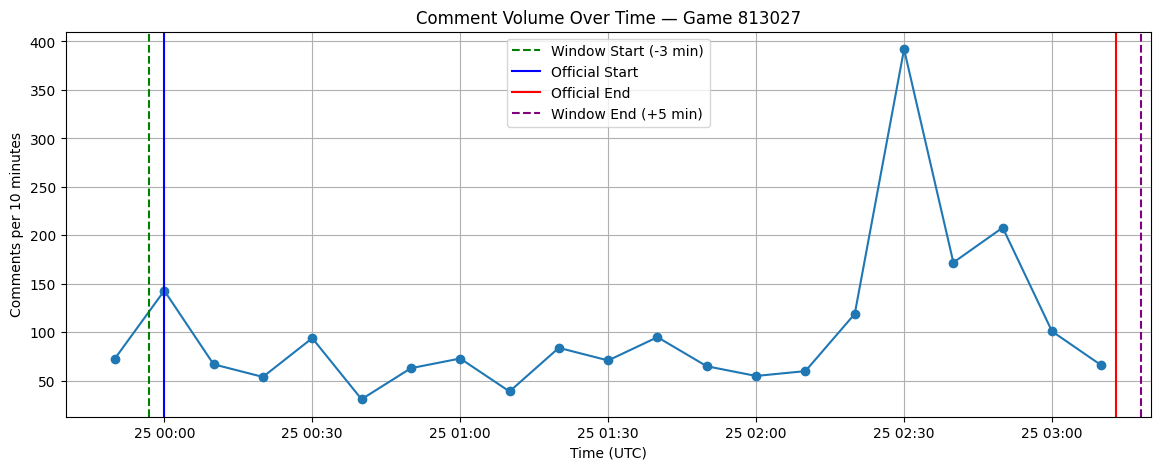

,0
comment_datetime_utc,
2025-10-24 23:50:00+00:00,73
2025-10-25 00:00:00+00:00,143
2025-10-25 00:10:00+00:00,67
2025-10-25 00:20:00+00:00,54
2025-10-25 00:30:00+00:00,94
2025-10-25 00:40:00+00:00,31
2025-10-25 00:50:00+00:00,63
2025-10-25 01:00:00+00:00,73
2025-10-25 01:10:00+00:00,39


In [53]:
plot_comment_volume_for_game(
    comments_filtered,
    game_pk=813027,
    game_windows=game_windows,
    bin_minutes=10
)

### Part 3 - Text Preprocessing

#### 3.1 Preprocessing Foundation

Before cleaning and normalizing the comment text, several data preparation steps were performed to ensure that only valid, temporally aligned, and event-linked Reddit comments were included in the modeling dataset:

* Loaded merged Reddit–Statcast dataset
  * Imported the final merged_comments_events.csv file containing comment text and aligned pitch-level event metadata.

* Filtered to event-aligned samples
  * Removed all rows where description was missing, ensuring the dataset retained only comments matched to an identifiable baseball event.

* Removed non-textual or low-information comments
  * Excluded GIF-only messages and embedded media placeholders (e.g., giphy, gfycat, tenor links).
  * Eliminated extremely short comments that provide little linguistic signal.

* Retained essential fields for downstream NLP tasks
  * Preserved comment text, event labels, timestamps, and metadata such as pitch number and time-difference values.

In [54]:
# load dataframe from CSV for checkpoint
merged_path = "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/merged_comments_events.csv"

df = pd.read_csv(merged_path)

print("Loaded merged dataset:", df.shape)
df.head()

Loaded merged dataset: (15173, 20)


,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_body,comment_score,comment_created_utc,permalink,comment_datetime_utc,token_count,game_pk,event_datetime_estimated,description,events,pitch_number,time_diff_seconds
0,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866on,t3_1ofc2dw,True,How many white people going on Twitter to comp...,11,2025-10-24 23:57:02+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:02+00:00,13,813027,NaN,NaN,NaN,NaN,NaN
1,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866vh,t3_1ofc2dw,True,This is some weird megachurch shit,11,2025-10-24 23:57:04+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:04+00:00,6,813027,NaN,NaN,NaN,NaN,NaN
2,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl866zr,t3_1ofc2dw,True,You guys are complaining about this? We could...,17,2025-10-24 23:57:05+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:05+00:00,16,813027,NaN,NaN,NaN,NaN,NaN
3,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl867bo,t3_1ofc2dw,True,"The game is marked as ""Delayed"" on my MLB app ...",11,2025-10-24 23:57:08+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:08+00:00,26,813027,NaN,NaN,NaN,NaN,NaN
4,1,1ofc2dw,Game Thread: World Series Game 1 ⚾ Dodgers (0)...,2025-10-24 23:00:30+00:00,343,nl867r2,t3_1ofc2dw,True,I didn't realize the game was taking place in ...,8,2025-10-24 23:57:13+00:00,https://reddit.com/r/baseball/comments/1ofc2dw...,2025-10-24 23:57:13+00:00,11,813027,NaN,NaN,NaN,NaN,NaN


In [55]:
# Remove records with no event match
df = df[df["description"].notna()].copy()
print("After removing NaN descriptions:", df.shape)

After removing NaN descriptions: (983, 20)


In [56]:
# remove comments that are Gifs
gif_pattern = r"!\[gif\]\(|!\[\]\(|giphy|gfycat|tenor"

df = df[~df["comment_body"].str.contains(gif_pattern, case=False, na=False)].copy()

print("After removing GIF comments:", df.shape)

After removing GIF comments: (966, 20)


In [57]:
# Remove short reaction comments
df = df[df["comment_body"].str.len() > 3]
print("After removing very short comments:", df.shape)

After removing very short comments: (965, 20)


In [58]:
# Cleaned dataframe for preprocessing
cleaned_df = df.reset_index(drop=True)
cleaned_df.shape

(965, 20)

#### 3.2 Lowercasing / Normalization

Lowercasing is the first preprocessing step because it reduces vocabulary sparsity by ensuring that words like “Strike”, “strike”, and “STRIKE” all map to the same representation. This prevents duplicate lexical forms and stabilizes downstream tokenization, stopword removal, and lemmatization. Lowercasing should occur before any other text cleaning so that all normalization operates on consistent text.

In [59]:
# Create a new working column so each step can be examined independently
df["text_lower"] = df["comment_body"].astype(str).str.lower()

# Preview the transformation
df[["comment_body", "text_lower"]].head()

,comment_body,text_lower
12959,Vladdy and Springer singing the Canadian natio...,vladdy and springer singing the canadian natio...
12960,Is it a hot take to prefer O Canada to The Sta...,is it a hot take to prefer o canada to the sta...
12961,I just want to say before this final game\n\nI...,i just want to say before this final game\n\ni...
12962,"Today, I feel Canadian","today, i feel canadian"
12963,"Dodgers bros, this series has been awesome, be...","dodgers bros, this series has been awesome, be..."


#### 3.3 Remove URLs, Markdown Artifacts, Emojis, and Non-Linguistic Noise

After lowercasing, the next step is to remove visual, non-linguistic, or structural elements that do not contribute meaning to event prediction. This includes URLs, Reddit Markdown syntax, GIF placeholders, and emojis.
Removing these before tokenization prevents the tokenizer from turning them into meaningless tokens that increase vocabulary size and introduce noise. It also reduces processing time for later stages like lemmatization.

In [60]:
!pip install -q emoji
print("Emoji Installed")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.0 MB/s eta 0:00:00
Emoji Installed


In [61]:
import emoji

def remove_noise(text):
    text = str(text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove Markdown image/GIF links: ![gif](...), ![](…), [text](link)
    text = re.sub(r"!\[.*?\]\(.*?\)", "", text)   # images and gifs
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)    # markdown hyperlinks

    # Remove emoji using unicode ranges
    text = emoji.replace_emoji(text, replace=" ")

    # Remove leftover excessive whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply noise removal after lowercasing step
df["text_clean1"] = df["text_lower"].apply(remove_noise)

# Preview transformation
df[["text_lower", "text_clean1"]].head()

,text_lower,text_clean1
12959,vladdy and springer singing the canadian natio...,vladdy and springer singing the canadian natio...
12960,is it a hot take to prefer o canada to the sta...,is it a hot take to prefer o canada to the sta...
12961,i just want to say before this final game\n\ni...,i just want to say before this final game i fu...
12962,"today, i feel canadian","today, i feel canadian"
12963,"dodgers bros, this series has been awesome, be...","dodgers bros, this series has been awesome, be..."


#### 3.4 Remove Punctuation and Special Characters

After noise removal, the next step is to strip punctuation and special characters.
This step prepares the text for clean tokenization by ensuring that:
* tokens consist only of alphabetic characters
* punctuation (e.g., “!!!”, “???”) does not inflate vocabulary size
* random symbols left behind by normalization steps are removed
* spaCy’s tokenizer receives a clean, consistent input

This step must occur before tokenization, so that the tokenizer is not forced to interpret punctuation as separate tokens.

In [62]:
def remove_punctuation(text):
    text = str(text)

    # Keep only alphabetic characters and spaces
    text = re.sub(r"[^a-z\s]", " ", text)

    # Normalize multiple spaces into one
    text = re.sub(r"\s+", " ", text).strip()

    return text

df["text_clean2"] = df["text_clean1"].apply(remove_punctuation)

# Preview transformation
df[["text_clean1", "text_clean2"]].head()

,text_clean1,text_clean2
12959,vladdy and springer singing the canadian natio...,vladdy and springer singing the canadian natio...
12960,is it a hot take to prefer o canada to the sta...,is it a hot take to prefer o canada to the sta...
12961,i just want to say before this final game i fu...,i just want to say before this final game i fu...
12962,"today, i feel canadian",today i feel canadian
12963,"dodgers bros, this series has been awesome, be...",dodgers bros this series has been awesome best...


#### 3.5 Tokenization

Tokenization converts cleaned text into a sequence of individual lexical units (tokens).
This is a critical step because all downstream preprocessing—stopword removal, lemmatization, feature extraction—operates at the token level rather than on raw strings.

Tokenization is performed after lowercasing, noise removal, and punctuation stripping so that:
* tokens are clean alphabetic units, not URLs, emojis, or punctuation
* the tokenizer does not produce large amounts of junk tokens
* vocabulary size is minimized
* lemmatization and stopword removal receive clean input

In [64]:
def tokenize(text):
    if pd.isna(text):
        return []
    return text.split()   # simple whitespace-based tokenization

df["text_tokens"] = df["text_clean2"].apply(tokenize)

# Preview transformation
df[["text_clean2", "text_tokens"]].head()

,text_clean2,text_tokens
12959,vladdy and springer singing the canadian natio...,"[vladdy, and, springer, singing, the, canadian..."
12960,is it a hot take to prefer o canada to the sta...,"[is, it, a, hot, take, to, prefer, o, canada, ..."
12961,i just want to say before this final game i fu...,"[i, just, want, to, say, before, this, final, ..."
12962,today i feel canadian,"[today, i, feel, canadian]"
12963,dodgers bros this series has been awesome best...,"[dodgers, bros, this, series, has, been, aweso..."


#### 3.6 Stopword Removal

Stopword removal filters out extremely common words that do not contribute meaningful signal to a supervised event-classification model.
Examples include the, is, and, was, they, etc. These words carry little semantic weight and tend to dominate vocabulary frequency.

Stopword removal occurs after tokenization because:
* stopwords must be evaluated token-by-token
* punctuation and noise must already be removed to avoid false matches
* removing stopwords now reduces the number of tokens that proceed to lemmatization, improving efficiency

In [65]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]

df["text_tokens_nostop"] = df["text_tokens"].apply(remove_stopwords)

# Preview transformation
df[["text_tokens", "text_tokens_nostop"]].head()

,text_tokens,text_tokens_nostop
12959,"[vladdy, and, springer, singing, the, canadian...","[vladdy, springer, singing, canadian, national..."
12960,"[is, it, a, hot, take, to, prefer, o, canada, ...","[hot, prefer, o, canada, star, spangled, banner]"
12961,"[i, just, want, to, say, before, this, final, ...","[want, final, game, fucking, love, baseball]"
12962,"[today, i, feel, canadian]","[today, feel, canadian]"
12963,"[dodgers, bros, this, series, has, been, aweso...","[dodgers, bros, series, awesome, best, luck]"


#### 3.7 Lemmatization

Lemmatization reduces each token to its base or dictionary form (lemma).
This step captures the underlying meaning of words by collapsing inflected or conjugated variants:
* “swinging” → “swing”
* “hit”, “hitting”, “hits” → “hit”
* “players” → “player”

Lemmatization is performed after stopword removal so spaCy does not waste time lemmatizing words that will be discarded anyway.

In [66]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # lightweight and fast

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))   # process the token list as a single text
    return [token.lemma_ for token in doc]

df["text_lemmas"] = df["text_tokens_nostop"].apply(lemmatize_tokens)

# Assemble final cleaned text string
df["clean_text"] = df["text_lemmas"].apply(lambda tokens: " ".join(tokens))

# Preview transformation
df[["comment_body", "clean_text"]].head()

,comment_body,clean_text
12959,Vladdy and Springer singing the Canadian natio...,vladdy springer sing canadian national anthem get
12960,Is it a hot take to prefer O Canada to The Sta...,hot prefer o canada star spangle banner
12961,I just want to say before this final game\n\nI...,want final game fucking love baseball
12962,"Today, I feel Canadian",today feel canadian
12963,"Dodgers bros, this series has been awesome, be...",dodgers bros series awesome well luck


#### 3.8 Examples of Raw vs Clean text

In [67]:
sample_examples = df[["comment_body", "clean_text"]].sample(5, random_state=42)

print("=== Raw vs Cleaned Text Examples ===")
display(sample_examples)

=== Raw vs Cleaned Text Examples ===


,comment_body,clean_text
13864,Don’t think we need a full screen ad for regul...,don t think need screen ad regular season foot...
13435,"Let them do their jobs bro, oh my god",let job bro oh god
13129,Leaving runners stranded is gonna be the death...,leave runner strand go to death
13369,Vlad mvp,vlad mvp
13029,Bro if you're going to run THEN RUN,bro go run run


#### 3.9 Corpus Statistics

Basic corpus statistics help characterize the dataset and inform modeling decisions.
* Average raw comment length (in characters and tokens)
* Average cleaned text length
* Vocabulary size (unique lemmas across the corpus)
* Lexical diversity (ratio of unique lemmas to total lemmas)

In [68]:
# Raw lengths
df["raw_char_len"] = df["comment_body"].str.len()
df["raw_token_len"] = df["comment_body"].str.split().apply(len)

# Cleaned lengths
df["clean_token_len"] = df["clean_text"].str.split().apply(len)

# Vocabulary
all_tokens = [token for tokens in df["text_lemmas"] for token in tokens]
vocab = set(all_tokens)

avg_raw_chars = df["raw_char_len"].mean()
avg_raw_tokens = df["raw_token_len"].mean()
avg_clean_tokens = df["clean_token_len"].mean()
vocab_size = len(vocab)
lexical_diversity = vocab_size / len(all_tokens)

print("=== Corpus Statistics ===")
print(f"Average raw comment length (characters): {avg_raw_chars:.2f}")
print(f"Average raw comment length (tokens): {avg_raw_tokens:.2f}")
print(f"Average cleaned comment length (tokens): {avg_clean_tokens:.2f}")
print(f"Vocabulary size (unique lemmas): {vocab_size}")
print(f"Lexical diversity (type/token ratio): {lexical_diversity:.4f}")

=== Corpus Statistics ===
Average raw comment length (characters): 69.64
Average raw comment length (tokens): 13.11
Average cleaned comment length (tokens): 6.84
Vocabulary size (unique lemmas): 1612
Lexical diversity (type/token ratio): 0.2441


### Part 4 - Data Understanding and Preparation

#### 4.1 Exploratory Analysis of Text Data

Exploratory analysis helps characterize the linguistic and event-driven properties of the dataset.

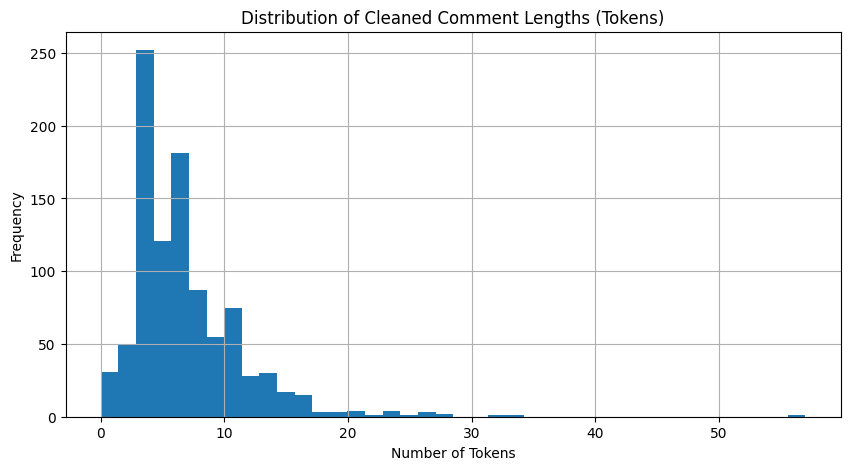

count    965.000000
mean       6.844560
std        4.604783
min        0.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       57.000000
Name: clean_token_len, dtype: float64


In [69]:
# Distribution of cleaned text lengths
plt.figure(figsize=(10,5))
df["clean_token_len"].hist(bins=40)
plt.title("Distribution of Cleaned Comment Lengths (Tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Summary stats
print(df["clean_token_len"].describe())

This distribution of cleaned comment lengths show that most comments are short, which keeps in alignment with conversational threads on reddit. The mean length of a comment is 6.84 tokens and the median is 6 tokens which indicated the typical fan commentary contains a small number of meaningful words. The presence of extremely long comments (max = 57 tokens) is rare and represents outliers rather than the norm. This pattern suggests that event-classification models must be effective with short textual inputs, as most comments provide limited linguistic context.

#### 4.2 Word Frequency & Category Distribution

##### 4.2.1 Top Word Frequencies

This analysis identifies the dominant lexical themes in the dataset after preprocessing.

In [70]:
from collections import Counter

# Flatten list of tokens
all_lemmas = [lemma for tokens in df["text_lemmas"] for lemma in tokens]

lemma_freq = Counter(all_lemmas).most_common(25)

# Convert to dataframe for neat display
freq_df = pd.DataFrame(lemma_freq, columns=["lemma", "count"])

print("=== Top 25 Most Frequent Lemmas ===")
display(freq_df)

=== Top 25 Most Frequent Lemmas ===


,lemma,count
0,s,143
1,game,139
2,hit,120
3,ohtani,113
4,t,105
5,fuck,101
6,series,88
7,run,81
8,get,77
9,time,77


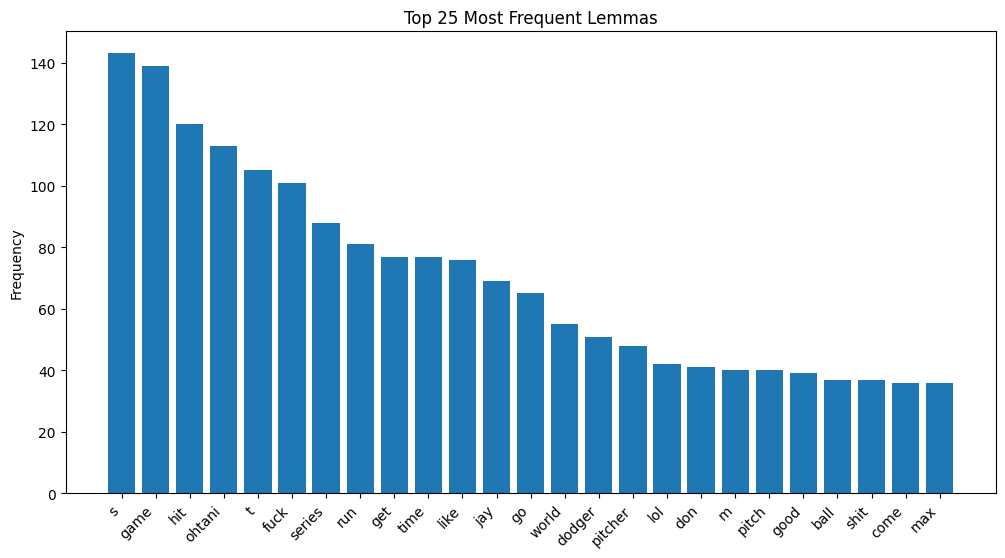

In [71]:
# Visualization
plt.figure(figsize=(12,6))
plt.bar(freq_df["lemma"], freq_df["count"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 25 Most Frequent Lemmas")
plt.ylabel("Frequency")
plt.show()

The most frequent lemmas confirm that the dataset is strongly tied to baseball action, with terms like game, hit, run, and pitch appearing prominently. Player names (e.g., ohtani, max) and expressive language (lol, fuck, shit) reflect both event-driven and emotional reactions. The presence of contraction fragments (s, t, m) highlights informal writing typical of Reddit. Overall, the vocabulary supports event-focused modeling but includes noise consistent with real-time fan discussions.

##### 4.2.2 Distribution by Category (Pitch Descriptions)
* called_strike
* swinging_strike
* ball
* hit_into_play
* home_run
* force_out
* strikeout
* etc.

=== Distribution of MLB Pitch/Event Descriptions ===


,count
description,
ball,263
hit_into_play,228
swinging_strike,141
foul,119
called_strike,102
swinging_strike_blocked,54
blocked_ball,29
automatic_ball,21
foul_bunt,6


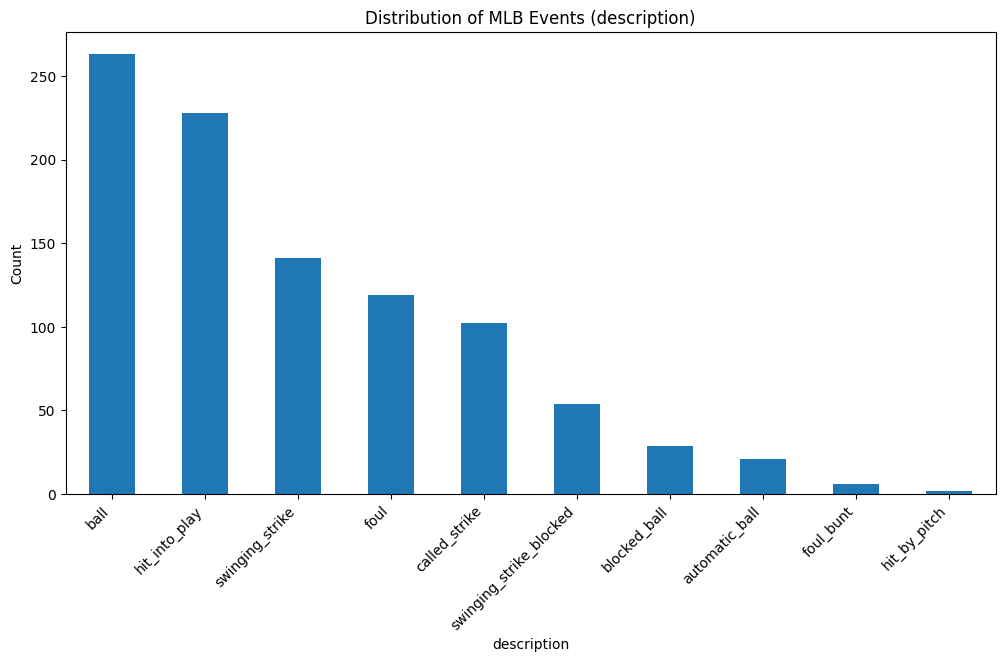

In [72]:
# Frequency of event labels
desc_counts = df["description"].value_counts()

print("=== Distribution of MLB Pitch/Event Descriptions ===")
display(desc_counts)

# Plot
plt.figure(figsize=(12,6))
desc_counts.plot(kind='bar')
plt.title("Distribution of MLB Events (description)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

Event frequencies are highly imbalanced, with common events (balls, strikes, fouls) appearing far more often than rare events (hit_by_pitch, foul_bunt). This mirrors natural MLB gameplay but poses a challenge for supervised learning, as models may favor majority classes. The imbalance justifies collapsing events into broader categories to improve model stability, especially given the noise introduced by temporal alignment.

##### 4.3 Data Issues

During dataset construction and alignment, several data-quality challenges were identified. Each issue required targeted mitigation to ensure the final corpus was stable, reliable, and suitable for downstream NLP tasks.

**Temporal Misalignment Between Comments and Events**
- Reddit comments do not always refer to the nearest pitch or play.
- Estimated Statcast timestamps introduce additional uncertainty.

Mitigation:
- Restricted comments to a strict in-game window (−3 to +5 minutes).
- Removed all comments without a valid matched event.

**Class Imbalance Across MLB Event Types**
- Routine events (balls, strikes, fouls) dominate the dataset.
- Rare events (e.g., hit_by_pitch, foul_bunt) appear only a few times.

Mitigation:
- Collapsed granular Statcast events into broader event groups.
- Applied class-weighting during supervised learning to stabilize training.

#### Part 5 - Sentiment Analysis

##### 5.1 Sentiment Analysis Setup

In [73]:
# Install & import VADER
!pip install vaderSentiment --quiet

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

analyzer = SentimentIntensityAnalyzer()

print("VADER ready.")

VADER ready.


##### 5.2 Compute Sentiment Score

In [77]:
def get_vader_scores(text):
    if pd.isna(text):
        return {"pos": np.nan, "neu": np.nan, "neg": np.nan, "compound": np.nan}
    scores = analyzer.polarity_scores(text)
    return scores

# Apply VADER to each cleaned comment
sentiment_results = df["clean_text"].apply(get_vader_scores)

# Convert list of dicts → dataframe
sentiment_df = pd.DataFrame(sentiment_results.tolist())

# Merge into dataset
df_sentiment = pd.concat([df.reset_index(drop=True), sentiment_df], axis=1)

df_sentiment.head()

,game_number,post_id,post_title,post_created_utc,post_score,comment_id,comment_parent_id,is_root,comment_body,comment_score,...,text_tokens_nostop,text_lemmas,clean_text,raw_char_len,raw_token_len,clean_token_len,neg,neu,pos,compound
0,7,1om1pdl,Game Thread: World Series Game 7 ⚾ Dodgers (3)...,2025-11-01 23:00:30+00:00,587,nmmbl5o,t3_1om1pdl,True,Vladdy and Springer singing the Canadian natio...,13,...,"[vladdy, springer, singing, canadian, national...","[vladdy, springer, sing, canadian, national, a...",vladdy springer sing canadian national anthem get,63,10,7,0.0,1.000,0.000,0.0000
1,7,1om1pdl,Game Thread: World Series Game 7 ⚾ Dodgers (3)...,2025-11-01 23:00:30+00:00,587,nmmbmwm,t3_1om1pdl,True,Is it a hot take to prefer O Canada to The Sta...,12,...,"[hot, prefer, o, canada, star, spangled, banner]","[hot, prefer, o, canada, star, spangle, banner]",hot prefer o canada star spangle banner,64,13,7,0.0,1.000,0.000,0.0000
2,7,1om1pdl,Game Thread: World Series Game 7 ⚾ Dodgers (3)...,2025-11-01 23:00:30+00:00,587,nmmbt3d,t3_1om1pdl,True,I just want to say before this final game\n\nI...,17,...,"[want, final, game, fucking, love, baseball]","[want, final, game, fucking, love, baseball]",want final game fucking love baseball,66,13,6,0.0,0.408,0.592,0.6997
3,7,1om1pdl,Game Thread: World Series Game 7 ⚾ Dodgers (3)...,2025-11-01 23:00:30+00:00,587,nmmbyxl,t3_1om1pdl,True,"Today, I feel Canadian",12,...,"[today, feel, canadian]","[today, feel, canadian]",today feel canadian,22,4,3,0.0,1.000,0.000,0.0000
4,7,1om1pdl,Game Thread: World Series Game 7 ⚾ Dodgers (3)...,2025-11-01 23:00:30+00:00,587,nmmc59m,t3_1om1pdl,True,"Dodgers bros, this series has been awesome, be...",13,...,"[dodgers, bros, series, awesome, best, luck]","[dodgers, bros, series, awesome, well, luck]",dodgers bros series awesome well luck,84,16,6,0.0,0.246,0.754,0.8481


##### 5.3 Visualizations

Sentiment by Event

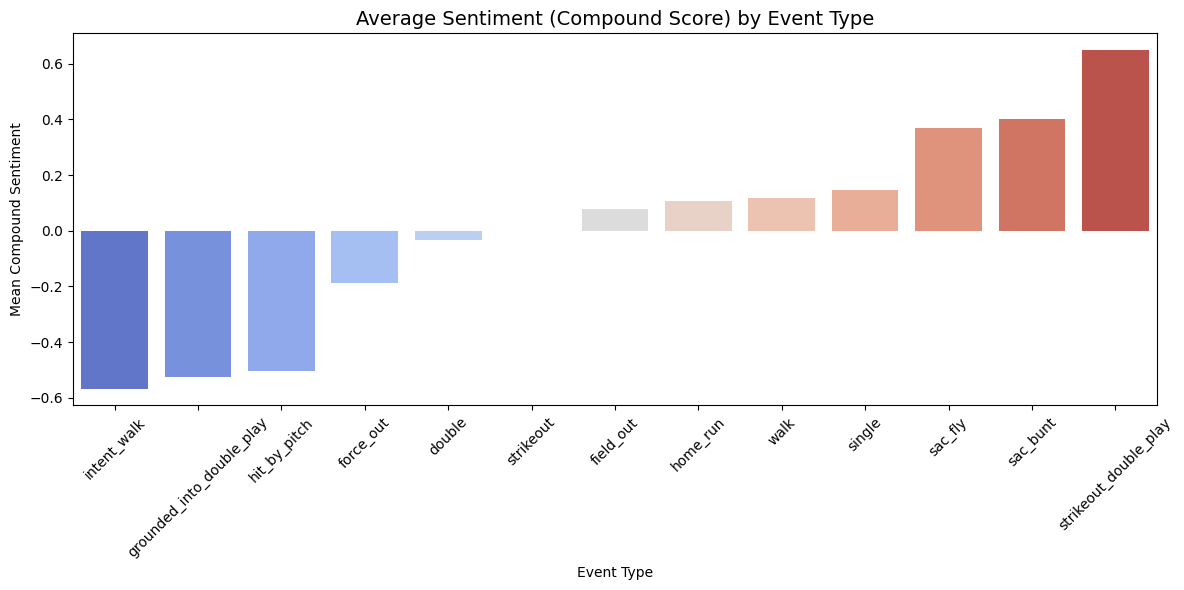

In [80]:
plt.figure(figsize=(12, 6))

event_sentiment = df_sentiment.groupby("events")["compound"].mean().sort_values()

sns.barplot(
    x=event_sentiment.index,
    y=event_sentiment.values,
    palette="coolwarm"
)

plt.title("Average Sentiment (Compound Score) by Event Type", fontsize=14)
plt.ylabel("Mean Compound Sentiment")
plt.xlabel("Event Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fan sentiment displayed only minor variation across different event types. Offensive events showed a slightly higher mean compound score, reflecting mild positive reactions, whereas strikeouts and outs produced slightly lower but still near-neutral sentiment. However, the differences between event categories are small, indicating that fans generally respond with conversational commentary rather than strong emotional polarity. This pattern suggests that single-event outcomes do not drastically shift the emotional tone of Game Thread discussions, which limits the predictive value of sentiment as an isolated feature.

Sentiment over time

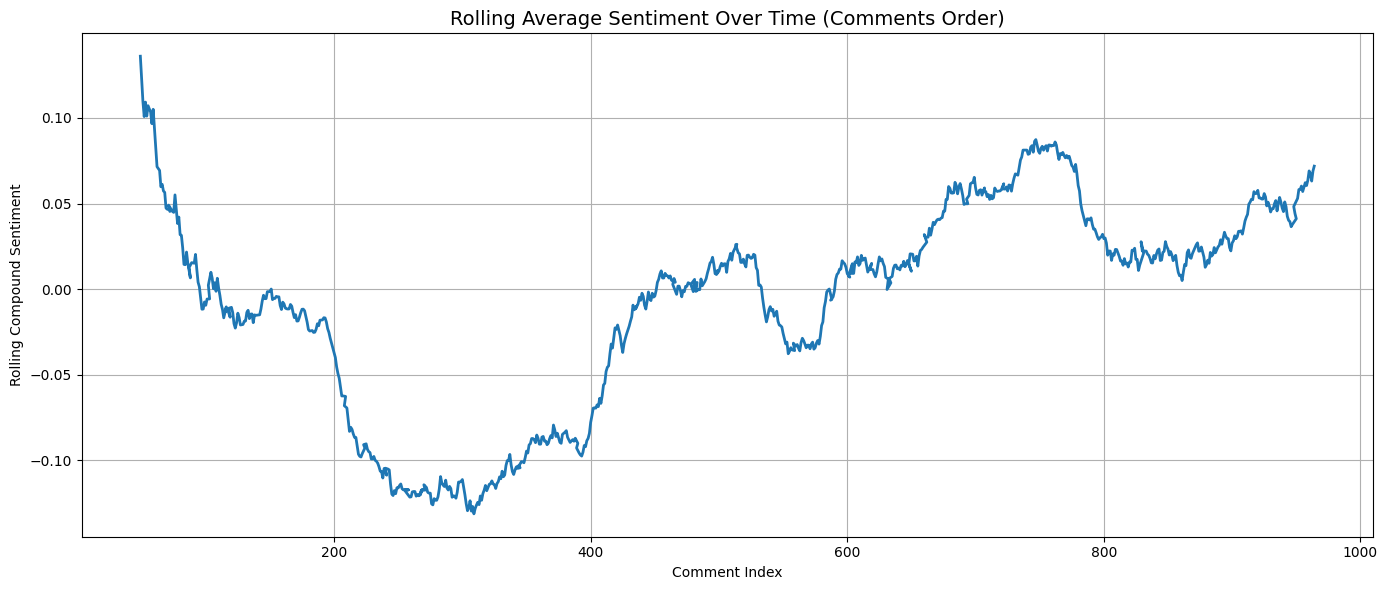

In [82]:
# Sort by actual timestamp column
df_sentiment_sorted = df_sentiment.sort_values("comment_datetime_utc")

# Rolling sentiment smoothing
df_sentiment_sorted["rolling_sentiment"] = (
    df_sentiment_sorted["compound"].rolling(window=200, min_periods=50).mean()
)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_sentiment_sorted["rolling_sentiment"], linewidth=2)

plt.title("Rolling Average Sentiment Over Time (Comments Order)", fontsize=14)
plt.xlabel("Comment Index")
plt.ylabel("Rolling Compound Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

The rolling sentiment timeline reveals that fan sentiment remains broadly stable over the course of each game, with only modest fluctuations. Short-lived peaks and dips appear around clusters of events, but overall sentiment stays close to neutral. This trend indicates that real-time discussion is continuous and context-driven rather than dominated by emotional extremes. As a result, temporal sentiment patterns contribute useful context but do not independently signal major shifts in gameplay or fan perception.

##### 5.4 Save Sentiment Summaries

In [116]:
sentiment_summary = df_sentiment.groupby("events")["compound"].agg(
    ["mean", "std", "count"]
)

sentiment_summary.to_csv("/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/sentiment_summary_by_event.csv", index=True)

print("Sentiment summaries exported.")
sentiment_summary

Sentiment summaries exported.


,mean,std,count
events,,,
double,-0.032478,0.408363,49
field_out,0.079538,0.428255,139
force_out,-0.186567,0.191047,3
grounded_into_double_play,-0.526700,NaN,1
hit_by_pitch,-0.504900,0.203222,2
home_run,0.106067,0.183713,3
intent_walk,-0.567000,0.079235,3
sac_bunt,0.401900,NaN,1
sac_fly,0.368733,0.329978,6


##### 5.5 Hypothesis and Testing

My Hypothesis: Fan sentiment becomes significantly more positive during positive offensive events (e.g., hits, home runs) and more negative during strikeouts and routine outs

###### 5.5.1 Define Event Groups for the Hypothesis

In [151]:
# Collapse events into sentiment groups
def sentiment_group(e):
    if e in ["single", "double", "triple", "home_run", "hit_into_play"]:
        return "positive_offense"
    elif e in ["strikeout", "strikeout_double_play", "swinging_strike", "called_strike"]:
        return "strikeout_or_out"
    elif e in ["ball", "blocked_ball", "automatic_ball"]:
        return "neutral_pitch"
    else:
        return "other"

df_sentiment["sentiment_group"] = df_sentiment["events"].apply(sentiment_group)

df_sentiment["sentiment_group"].value_counts()

,count
sentiment_group,
other,768
strikeout_or_out,119
positive_offense,78


###### 5.5.2 Compute Mean Compound Sentiment Per Group

In [152]:
sentiment_means = (
    df_sentiment.groupby("sentiment_group")["compound"].mean().sort_values()
)

print("Mean Sentiment per Group:")
print(sentiment_means)

Mean Sentiment per Group:
sentiment_group
other               0.001827
strikeout_or_out    0.003513
positive_offense    0.032772
Name: compound, dtype: float64


###### 5.5.3 Test

In [153]:
from scipy.stats import ttest_ind

# Extract samples
pos = df_sentiment[df_sentiment["sentiment_group"] == "positive_offense"]["compound"]
neg = df_sentiment[df_sentiment["sentiment_group"] == "strikeout_or_out"]["compound"]

# Run independent t-test
t_stat, p_value = ttest_ind(pos, neg, equal_var=False)

print("T-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

T-test results:
t-statistic: 0.43886734360823304
p-value: 0.6612796450647859


###### 5.5.4 Interpret

In [154]:
alpha = 0.05
if p_value < alpha:
    print("Result: Significant difference in sentiment between positive offensive events and strikeouts/outs.")
    if pos.mean() > neg.mean():
        print("Positive offensive events have significantly higher sentiment → hypothesis supported.")
    else:
        print("Positive offensive events have significantly lower sentiment → hypothesis contradicted.")
else:
    print("Result: No statistically significant difference found → hypothesis not supported.")

Result: No statistically significant difference found → hypothesis not supported.


The hypothesis predicted that fan sentiment would become notably more positive during offensive events and more negative during strikeouts and outs. While positive offensive events did show the highest average sentiment (0.0328), the difference between offensive and negative events was extremely small. The t-test confirmed that this difference was not statistically significant (p = 0.6613). This indicates that fan emotional responses in Reddit Game Threads do not sharply diverge across event types, suggesting that real-time sentiment may be more influenced by context, game state, or collective excitement rather than by isolated pitch-level outcomes. Therefore, the hypothesis is not supported by the data.

#### Part 6 - Topic Modeling

##### 6.1 Topic Modeling with Hyperparameter Tuning (LDA)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [93]:
df_cleaned_comments = df_sentiment.copy()

df_cleaned_comments.columns

Index(['game_number', 'post_id', 'post_title', 'post_created_utc',
       'post_score', 'comment_id', 'comment_parent_id', 'is_root',
       'comment_body', 'comment_score', 'comment_created_utc', 'permalink',
       'comment_datetime_utc', 'token_count', 'game_pk',
       'event_datetime_estimated', 'description', 'events', 'pitch_number',
       'time_diff_seconds', 'text_lower', 'text_clean1', 'text_clean2',
       'text_tokens', 'text_tokens_nostop', 'text_lemmas', 'clean_text',
       'raw_char_len', 'raw_token_len', 'clean_token_len', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [94]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [95]:
# df_cleaned_comments must contain:

df_cleaned_comments["token_list"] = df_cleaned_comments["clean_text"].apply(nltk.word_tokenize)

# Build Gensim dictionary + corpus for coherence
dictionary = Dictionary(df_cleaned_comments["token_list"])
gensim_corpus = [dictionary.doc2bow(tokens) for tokens in df_cleaned_comments["token_list"]]

In [96]:
# Hyperparameters to test
topic_counts = [5, 8, 10]
ngram_settings = [(1,1), (1,2)]
min_df_settings = [10, 20]

results = []
models = {}

print("Starting hyperparameter search...\n")

Starting hyperparameter search...



In [98]:
for ngram in ngram_settings:
    for min_df in min_df_settings:
        # Vectorizer for this config
        vectorizer = CountVectorizer(
            stop_words="english",
            ngram_range=ngram,
            min_df=min_df,
            max_df=0.75
        )

        dtm = vectorizer.fit_transform(df_cleaned_comments["clean_text"])
        feature_names = vectorizer.get_feature_names_out()

        for k in topic_counts:
            lda = LatentDirichletAllocation(
                n_components=k,
                max_iter=20,
                learning_method="batch",
                random_state=42
            )

            lda.fit(dtm)

            # Extract top words for coherence check
            topic_word_lists = []
            for topic_idx, topic in enumerate(lda.components_):
                top_indices = topic.argsort()[-15:][::-1]
                top_words = [feature_names[i] for i in top_indices]
                topic_word_lists.append(top_words)

            # Convert to gensim topic format
            gensim_topics = topic_word_lists

            # Compute coherence
            cm = CoherenceModel(
                topics=gensim_topics,
                texts=df_cleaned_comments["token_list"],
                dictionary=dictionary,
                coherence='c_v'
            )

            coherence_score = cm.get_coherence()

            results.append({
                "num_topics": k,
                "ngram_range": ngram,
                "min_df": min_df,
                "coherence": coherence_score
            })

            # Save model
            models[(k, ngram, min_df)] = {
                "model": lda,
                "vectorizer": vectorizer,
                "topics": topic_word_lists
            }

            print(f"Completed: k={k}, ngram={ngram}, min_df={min_df}, coherence={coherence_score:.4f}")

print("\nHyperparameter search finished.")

Completed: k=5, ngram=(1, 1), min_df=10, coherence=0.3672
Completed: k=8, ngram=(1, 1), min_df=10, coherence=0.3471
Completed: k=10, ngram=(1, 1), min_df=10, coherence=0.3622
Completed: k=5, ngram=(1, 1), min_df=20, coherence=0.2809
Completed: k=8, ngram=(1, 1), min_df=20, coherence=0.2884
Completed: k=10, ngram=(1, 1), min_df=20, coherence=0.2824
Completed: k=5, ngram=(1, 2), min_df=10, coherence=0.3779
Completed: k=8, ngram=(1, 2), min_df=10, coherence=0.3361
Completed: k=10, ngram=(1, 2), min_df=10, coherence=0.3371
Completed: k=5, ngram=(1, 2), min_df=20, coherence=0.2754
Completed: k=8, ngram=(1, 2), min_df=20, coherence=0.2863
Completed: k=10, ngram=(1, 2), min_df=20, coherence=0.3027

Hyperparameter search finished.


##### 6.2 View hyperparameter results

In [99]:
results_df = pd.DataFrame(results)
results_df.sort_values("coherence", ascending=False)

,num_topics,ngram_range,min_df,coherence
6,5,"(1, 2)",10,0.377923
0,5,"(1, 1)",10,0.367188
2,10,"(1, 1)",10,0.362154
1,8,"(1, 1)",10,0.347070
8,10,"(1, 2)",10,0.337065
7,8,"(1, 2)",10,0.336145
11,10,"(1, 2)",20,0.302721
4,8,"(1, 1)",20,0.288399
10,8,"(1, 2)",20,0.286325
5,10,"(1, 1)",20,0.282446


##### 6.3 Selecting the Best Model

In [100]:
best_row = results_df.sort_values("coherence", ascending=False).iloc[0]
best_row

,6
num_topics,5
ngram_range,"(1, 2)"
min_df,10
coherence,0.377923


In [101]:
best_key = (best_row["num_topics"], best_row["ngram_range"], best_row["min_df"])
best_model_info = models[(best_key)]

lda_best = best_model_info["model"]
vectorizer_best = best_model_info["vectorizer"]
topics_best = best_model_info["topics"]

topics_best

[['game',
  'series',
  'world',
  'world series',
  'max',
  'good',
  'bench',
  'win',
  'game world',
  'fan',
  'clear',
  'mad max',
  'mad',
  'thing',
  'dodger'],
 ['ohtani',
  'fuck',
  'time',
  'shit',
  'extra',
  'rule',
  'extra time',
  'bullshit',
  'warm',
  'shohei',
  'holy',
  'lol',
  'holy shit',
  'want',
  'say'],
 ['jay',
  'run',
  'come',
  'need',
  'blue',
  'blue jay',
  'man',
  'don',
  'dodger',
  'base',
  'play',
  'special',
  'love',
  'let',
  'team'],
 ['game',
  'bad',
  'look',
  'scherzer',
  've',
  'interview',
  'like',
  'fuck',
  'think',
  'happen',
  'guy',
  'watch',
  'baseball',
  'inne',
  'mlb'],
 ['hit',
  'pitcher',
  'ball',
  'like',
  'pitch',
  'lol',
  'lmao',
  'springer',
  'try',
  'run',
  'batter',
  'delete',
  'think',
  'try hit',
  'innings']]

##### 6.4 Assign topics

In [102]:
# Assign dominant topic
dtm_best = vectorizer_best.transform(df_cleaned_comments["clean_text"])
topic_distribution = lda_best.transform(dtm_best)

df_cleaned_comments["dominant_topic"] = topic_distribution.argmax(axis=1)
df_cleaned_comments[["clean_text", "dominant_topic"]].head()

,clean_text,dominant_topic
0,vladdy springer sing canadian national anthem get,4
1,hot prefer o canada star spangle banner,0
2,want final game fucking love baseball,0
3,today feel canadian,4
4,dodgers bros series awesome well luck,0


##### 6.5 Visualization

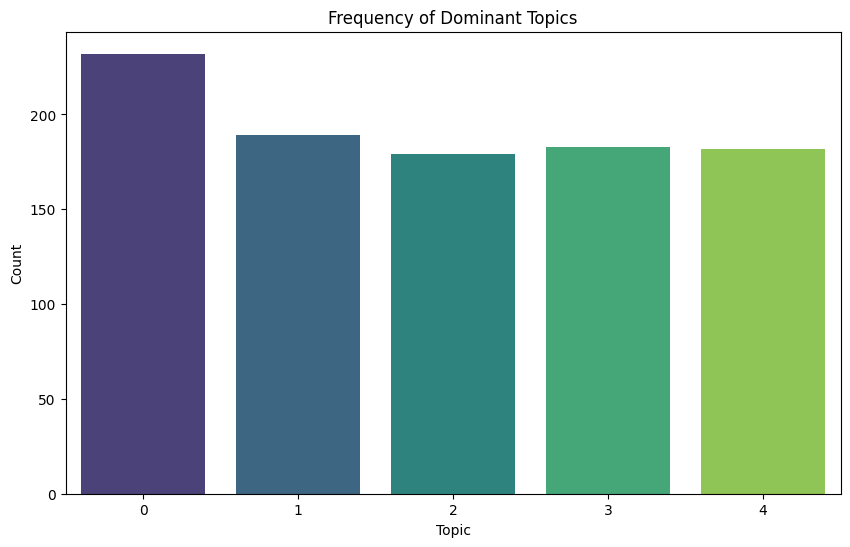

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x="dominant_topic", data=df_cleaned_comments, palette="viridis")
plt.title("Frequency of Dominant Topics")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()

##### 6.6 Human Topic Labels

**Topic 1 — Emotional Outbursts, Complaints, and Reactions to Calls**
  - The presence of emotionally charged terms (“fuck,” “shit,” “bullshit,” “holy shit,” “time,” “rule”) indicates frustration, disbelief, or excitement. Mentions of Ohtani/Shohei add star-player emotional context.

**Topic 2 — Team Support, Momentum, and Motivation Talk**
  - This cluster contains motivational or momentum-related terms (“run,” “come,” “need,” “love,” “team”), with references to Blue Jays and Dodgers.

**Topic 3 — Criticism, Analysis, and Commentary on Player Performance**
  - Words like “bad,” “look,” “scherzer,” “interview,” “watch baseball” indicate evaluative or critical commentary about players, decisions, or performance.

**Topic 4 — At-Bat Reactions and Pitch-by-Pitch Commentary**
  - Keywords such as “hit,” “pitcher,” “ball,” “pitch,” “batter,” and “springer” clearly link to micro-level gameplay.

In [156]:
# Define human-readable topic labels
topic_labels = {
    0: "World Series Context & Game-Level Commentary",
    1: "Emotional Outbursts and Reactions to Calls",
    2: "Team Support, Momentum, and Motivation",
    3: "Criticism and Player Performance Commentary",
    4: "At-Bat Reactions and Pitch-by-Pitch Commentary"
}

# Map labels to the dataframe
df_cleaned_comments["topic_label"] = df_cleaned_comments["dominant_topic"].map(topic_labels)

# Preview
df_cleaned_comments[["clean_text", "dominant_topic", "topic_label"]].head()

,clean_text,dominant_topic,topic_label
0,vladdy springer sing canadian national anthem get,4,At-Bat Reactions and Pitch-by-Pitch Commentary
1,hot prefer o canada star spangle banner,0,World Series Context & Game-Level Commentary
2,want final game fucking love baseball,0,World Series Context & Game-Level Commentary
3,today feel canadian,4,At-Bat Reactions and Pitch-by-Pitch Commentary
4,dodgers bros series awesome well luck,0,World Series Context & Game-Level Commentary


Save to CSV

In [157]:
df_cleaned_comments.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/topics_labeled.csv",
    index=False
)

print("Saved topic-labeled dataset.")

Saved topic-labeled dataset.


Topics with top words

In [158]:
for i, words in enumerate(topics_best):
    print(f"\nTopic {i}: {topic_labels[i]}")
    print(", ".join(words))


Topic 0: World Series Context & Game-Level Commentary
game, series, world, world series, max, good, bench, win, game world, fan, clear, mad max, mad, thing, dodger

Topic 1: Emotional Outbursts and Reactions to Calls
ohtani, fuck, time, shit, extra, rule, extra time, bullshit, warm, shohei, holy, lol, holy shit, want, say

Topic 2: Team Support, Momentum, and Motivation
jay, run, come, need, blue, blue jay, man, don, dodger, base, play, special, love, let, team

Topic 3: Criticism and Player Performance Commentary
game, bad, look, scherzer, ve, interview, like, fuck, think, happen, guy, watch, baseball, inne, mlb

Topic 4: At-Bat Reactions and Pitch-by-Pitch Commentary
hit, pitcher, ball, like, pitch, lol, lmao, springer, try, run, batter, delete, think, try hit, innings


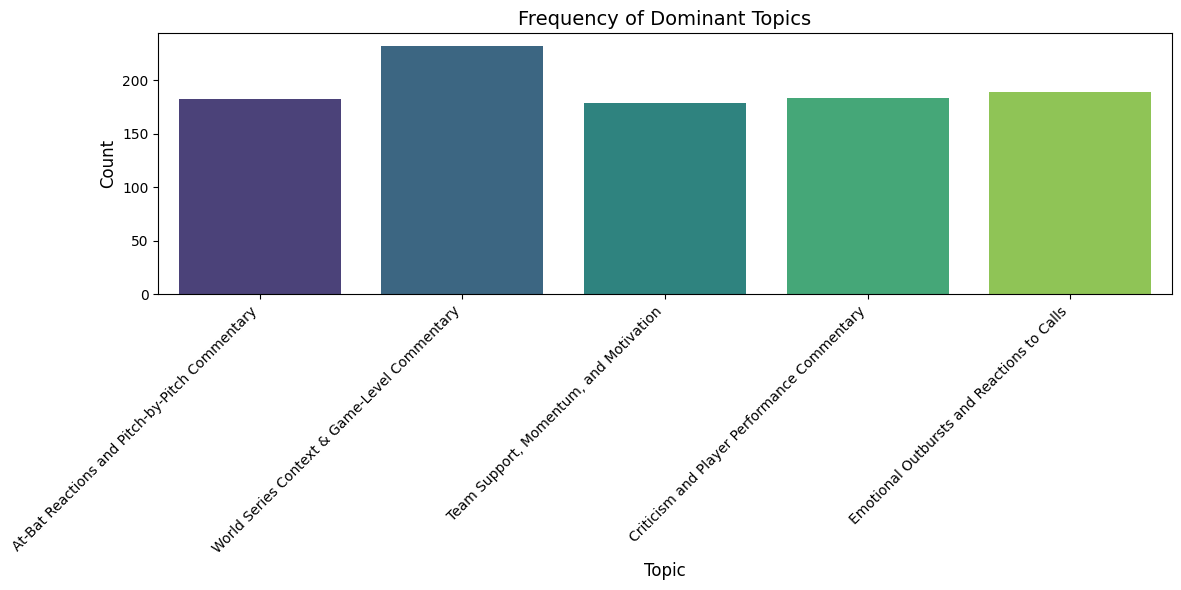

In [161]:
plt.figure(figsize=(12,6))

sns.countplot(
    x="topic_label",
    data=df_cleaned_comments,
    palette="viridis"
)

plt.title("Frequency of Dominant Topics", fontsize=14)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Part 7 - Supervised Learning

##### Pre-Step

In [136]:
def collapse_event(e):
    if e in ["single", "double", "home_run"]:
        return "hit"
    elif e in ["walk", "intent_walk", "hit_by_pitch"]:
        return "walk"
    elif e in ["strikeout", "strikeout_double_play"]:
        return "strikeout"
    else:
        return "out"

df_cleaned_comments["event_group"] = df_cleaned_comments["events"].apply(collapse_event)

##### 7.1 Prepare Dataset for Supervised Learning

In [137]:
# Feature (cleaned text)
X = df_cleaned_comments["clean_text"]

# Target (collapsed event categories)
y = df_cleaned_comments["event_group"]

# Inspect distribution
print(y.value_counts())

event_group
out          742
strikeout    119
hit           78
walk          26
Name: count, dtype: int64


##### 7.2 Train/Test Split (Stratified)

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 772
Test size: 193


##### 7.3 TF-IDF Vectorization

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1,2),
    min_df=3
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (772, 427)


##### 7.4 Logistic Regression Classifier

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score

logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    solver="lbfgs",
    multi_class="auto"
)

logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)

logreg_acc = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg, average="macro")

print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression Macro F1:", logreg_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.5440414507772021
Logistic Regression Macro F1: 0.2916398950750096

Classification Report:
               precision    recall  f1-score   support

         hit       0.10      0.12      0.11        16
         out       0.79      0.61      0.69       148
   strikeout       0.28      0.54      0.37        24
        walk       0.00      0.00      0.00         5

    accuracy                           0.54       193
   macro avg       0.29      0.32      0.29       193
weighted avg       0.65      0.54      0.58       193



##### 7.5 Linear SVM Classifier

In [141]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight="balanced")
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

svm_acc = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average="macro")

print("SVM Accuracy:", svm_acc)
print("SVM Macro F1:", svm_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6062176165803109
SVM Macro F1: 0.30278072592259064

Classification Report:
               precision    recall  f1-score   support

         hit       0.06      0.06      0.06        16
         out       0.79      0.70      0.75       148
   strikeout       0.34      0.50      0.41        24
        walk       0.00      0.00      0.00         5

    accuracy                           0.61       193
   macro avg       0.30      0.32      0.30       193
weighted avg       0.66      0.61      0.63       193



##### 7.6 Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average="macro")

print("Random Forest Accuracy:", rf_acc)
print("Random Forest Macro F1:", rf_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7253886010362695
Random Forest Macro F1: 0.2971476045416782

Classification Report:
               precision    recall  f1-score   support

         hit       0.00      0.00      0.00        16
         out       0.80      0.89      0.84       148
   strikeout       0.36      0.33      0.35        24
        walk       0.00      0.00      0.00         5

    accuracy                           0.73       193
   macro avg       0.29      0.31      0.30       193
weighted avg       0.65      0.73      0.69       193



##### 7.7 Model Comparison Table

In [143]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [logreg_acc, svm_acc, rf_acc],
    "Macro F1": [logreg_f1, svm_f1, rf_f1]
})

results.sort_values("Macro F1", ascending=False)

,Model,Accuracy,Macro F1
1,SVM,0.606218,0.302781
2,Random Forest,0.725389,0.297148
0,Logistic Regression,0.544041,0.291640


##### 7.8 Confusion Matrices

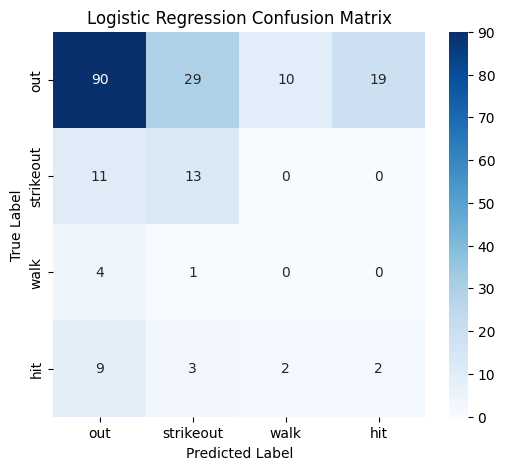

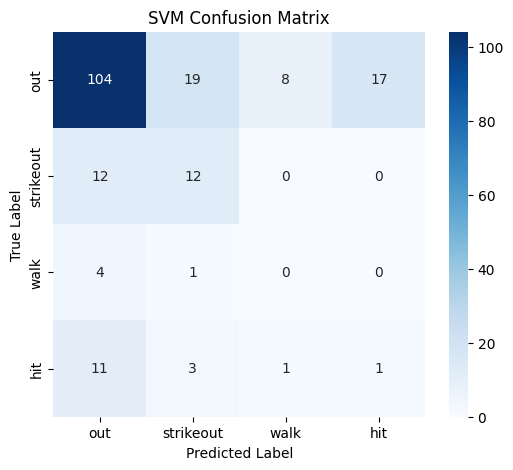

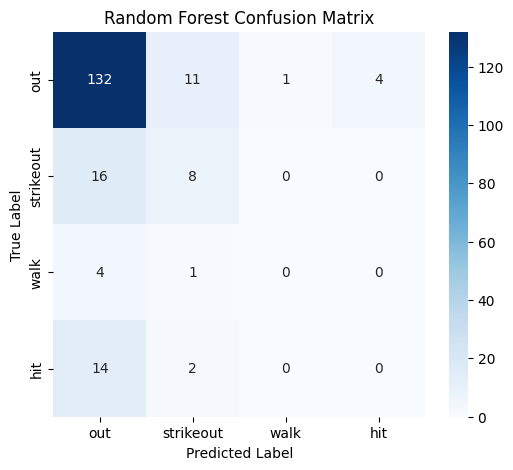

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=y.unique())
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=y.unique(),
                yticklabels=y.unique(),
                fmt="d")
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

plot_cm(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_cm(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [159]:
# Ensure consistent label ordering
labels = sorted(y.unique())

# --- Logistic Regression ---
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=labels)
pd.DataFrame(cm_logreg, index=labels, columns=labels).to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/confusion_matrix_logreg.csv"
)

# --- SVM ---
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
pd.DataFrame(cm_svm, index=labels, columns=labels).to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/confusion_matrix_svm.csv"
)

# --- Random Forest ---
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
pd.DataFrame(cm_rf, index=labels, columns=labels).to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/confusion_matrix_rf.csv"
)

# --- DistilBERT ---
cm_bert = confusion_matrix(y_test, bert_pred_labels, labels=labels)
pd.DataFrame(cm_bert, index=labels, columns=labels).to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/confusion_matrix_bert.csv"
)

print("All numeric confusion matrices exported successfully.")

All numeric confusion matrices exported successfully.


In [160]:
# Export classification reports
def classification_report_to_df(y_true, y_pred):
#Convert sklearn classification_report output into a clean pandas DataFrame.
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    return df_report

# --- Logistic Regression ---
report_logreg = classification_report_to_df(y_test, y_pred_logreg)
report_logreg.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/classification_report_logreg.csv"
)

# --- SVM ---
report_svm = classification_report_to_df(y_test, y_pred_svm)
report_svm.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/classification_report_svm.csv"
)

# --- Random Forest ---
report_rf = classification_report_to_df(y_test, y_pred_rf)
report_rf.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/classification_report_rf.csv"
)

# --- DistilBERT ---
report_bert = classification_report_to_df(y_test, bert_pred_labels)
report_bert.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/classification_report_bert.csv"
)

print("All classification reports exported successfully.")

All classification reports exported successfully.


##### 7.9 Transformer Model (DistilBERT Fine-Tuning)

In [147]:
# -------------------------------
# 7.9 DistilBERT Fine-Tuning
# -------------------------------

!pip install -q transformers datasets accelerate

import pandas as pd
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder

# 7.9.1 Prepare dataframes for HuggingFace Datasets
train_df = pd.DataFrame({
    "text": X_train.values,
    "label": y_train.values
})
test_df = pd.DataFrame({
    "text": X_test.values,
    "label": y_test.values
})

# Encode string labels -> integers
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

num_labels = len(label_encoder.classes_)
print("Label classes:", list(label_encoder.classes_))

# 7.9.2 Convert to HF Datasets
train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
test_dataset = Dataset.from_pandas(test_df, preserve_index=False)

# 7.9.3 Tokenizer & tokenization function
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding=True,
        truncation=True,
        max_length=128
    )

train_dataset = train_dataset.map(tokenize_batch, batched=True)
test_dataset = test_dataset.map(tokenize_batch, batched=True)

# Set format for PyTorch
train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])
train_dataset.set_format("torch")
test_dataset.set_format("torch")

# 7.9.4 Load model
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels
)

# 7.9.5 Training arguments (version-safe: no evaluation_strategy / save_strategy)
training_args = TrainingArguments(
    output_dir="./bert_output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./bert_logs",
    logging_steps=20
)

# 7.9.6 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# 7.9.7 Train and evaluate
trainer.train()

bert_eval = trainer.evaluate()
bert_eval

Label classes: ['hit', 'out', 'strikeout', 'walk']


Map:   0%|          | 0/772 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


Step,Training Loss
20,0.919900
40,0.758300
60,0.844800
80,0.769300
100,0.837300
120,0.836400
140,0.782300
160,0.689000
180,0.712700
200,0.668600


{'eval_loss': 0.7601639628410339,
 'eval_runtime': 11.5484,
 'eval_samples_per_second': 16.712,
 'eval_steps_per_second': 2.165,
 'epoch': 3.0}

In [148]:
results.to_csv("/content/drive/MyDrive/Colab Notebooks/IST 332 NLP/Final Project/supervised_model_results.csv", index=False)
print("Exported supervised model comparison table.")

Exported supervised model comparison table.


##### 7.10 Updated model comparison

In [149]:
import torch

# Get logits from the model
predictions = trainer.predict(test_dataset)

# Convert logits -> predicted class indices
bert_logits = predictions.predictions
bert_pred_indices = torch.tensor(bert_logits).argmax(dim=1).numpy()

# Convert class indices -> string labels
bert_pred_labels = label_encoder.inverse_transform(bert_pred_indices)

# Compute metrics
from sklearn.metrics import accuracy_score, f1_score

bert_accuracy = accuracy_score(y_test, bert_pred_labels)
bert_f1 = f1_score(y_test, bert_pred_labels, average="macro")

bert_accuracy, bert_f1

(0.7512953367875648, 0.2698412698412698)

In [150]:
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Linear SVM",
        "Random Forest",
        "DistilBERT Transformer"
    ],
    "Accuracy": [
        logreg_acc,
        svm_acc,
        rf_acc,
        bert_accuracy
    ],
    "Macro F1 Score": [
        logreg_f1,
        svm_f1,
        rf_f1,
        bert_f1
    ]
})

model_results.sort_values("Macro F1 Score", ascending=False)

,Model,Accuracy,Macro F1 Score
1,Linear SVM,0.606218,0.302781
2,Random Forest,0.725389,0.297148
0,Logistic Regression,0.544041,0.291640
3,DistilBERT Transformer,0.751295,0.269841


#### Part 8 - Deployment Plan

This section outlines how the NLP workflow—data collection, preprocessing, event alignment, modeling, monitoring, and retraining—can be deployed in a real-time production environment for MLB event recognition using social-media streams.

##### 8.1 Data Collection Automation

Reddit comments are continuously collected using PRAW, and MLB pitch-level events are retrieved using PyBaseball. A scheduled automation (Cron job or cloud function) queries new comments, retrieves up-to-date Statcast data, and stores both in a centralized cloud repository. Rate limits and API compliance are enforced at all times.

##### 8.2 Preprocessing Pipeline Automation

The system applies real-time text normalization—lowercasing, noise removal, tokenization, stopword removal, and lemmatization—to ensure incoming comments match the model’s training format. This pipeline mirrors the notebook’s preprocessing steps and guarantees consistency across inference.

##### 8.3 Real-Time Event Alignment

Incoming comments are timestamped and merged with the nearest estimated pitch timestamp using a rolling, nearest-neighbor alignment (merge_asof). Alignment operates within an adjustable tolerance window and ensures each comment receives an approximate event context for classification and real-time analysis.

##### 8.4 Model Inference Layer

A lightweight API service hosts the event classifier (e.g., DistilBERT or SVM). Each new comment is preprocessed, vectorized, and passed to the model for prediction. The system returns the predicted event class and confidence score, supporting real-time dashboards or monitoring tools.

##### 8.5 Model Storage & Versioning

Models are stored in cloud-based object storage (S3, GCS, or HuggingFace Model Hub) with semantic versioning. Each version preserves preprocessing parameters, vectorizers, tokenizer settings, and performance metrics to ensure reproducibility and safe rollback if model performance degrades.

##### 8.6 Monitoring & Drift Detection

System logs track prediction distributions, event frequencies, and model confidence over time. Drift metrics flag shifts in language use, sentiment patterns, or model accuracy. Alerts trigger when performance deviates from baseline expectations, signaling the need for model review or retraining.

##### 8.7 Model Retraining Strategy

The model is retrained periodically—seasonally, monthly, or when drift thresholds are exceeded—using newly collected comments and updated Statcast data. Automated data ingestion and preprocessing pipelines support seamless retraining, enabling continuous improvement and adaptability to new seasons or gameplay patterns.

##### 8.8 Output Integration & Application

Predictions feed into a real-time MLB analytics dashboard or fan-engagement monitoring system. Analysts can view event predictions, sentiment trajectories, topic activity, and comment volume in near real time to improve broadcasting insights, media coverage, or team operations.

##### 8.9 Ethics, Privacy, and Compliance

Only publicly available Reddit data is used, with all usernames removed to maintain anonymity. No personally identifiable information (PII) is stored. The system adheres to Reddit API policies and ensures predictions are used for analytical purposes only, avoiding any targeted or invasive applications.